<a href="https://colab.research.google.com/github/Andi-Saputra-Portfolio/credit_score/blob/main/Credit_Score_Andi_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetive
##### Building a machine learning model to predict customer eligibility in credit payments.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_a = pd.read_csv('/content/drive/MyDrive/Dibimbing/Materi/Day-44 (Final Project)/application_record.csv')
df_c = pd.read_csv('/content/drive/MyDrive/Dibimbing/Materi/Day-44 (Final Project)/credit_record.csv')

In [ ]:
df_a.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


| Feature            | Description                                           |
|--------------------|-------------------------------------------------------|
| ID                 | Client number                                         |
| CODE_GENDER        | Gender                                                |
| FLAG_OWN_CAR       | Owns a car                                            |
| FLAG_OWN_REALTY    | Owns a property                                       |
| CNT_CHILDREN       | Number of children                                    |
| AMT_INCOME_TOTAL   | Annual income                                         |
| NAME_INCOME_TYPE   | Income type                                           |
| NAME_EDUCATION_TYPE| Education level                                       |
| NAME_FAMILY_STATUS | Marital status                                        |
| NAME_HOUSING_TYPE  | Housing type                                          |
| DAYS_BIRTH         | Days since birth (negative values)                    |
| DAYS_EMPLOYED      | Days employed (negative values, positive = unemployed)|
| FLAG_MOBIL         | Has mobile phone                                      |
| FLAG_WORK_PHONE    | Has work phone                                        |
| FLAG_PHONE         | Has phone                                             |
| FLAG_EMAIL         | Has email                                             |
| OCCUPATION_TYPE    | Occupation                                            |
| CNT_FAM_MEMBERS    | Number of family members                              |

In [ ]:
df_c.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


| Feature              | Description                                           |
|--------------------  |-------------------------------------------------------|
| ID                   | Client                                                |
| MONTHS_BALANCE       | Months since the record (0 = current month, -1 = previous, etc.)                                                              |
| STATUS	Credit status| 0: 1-29 days overdue
|                      | 1: 30-59 days overdue
|                      | 2: 60-89 days overdue
|                      | 3: 90-119 days overdue
|                      | 4: 120-149 days overdue
|                      | 5: 150+ days overdue / bad debt
|                      | C: Paid off that month
|                      | X: No loan for the month

# Identify Application Record

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

## Check Duplicated Data

In [ ]:
df_a.duplicated(subset=['ID']).sum()

np.int64(47)

In [ ]:
df_a.duplicated().sum()

np.int64(0)

### Example

In [ ]:
df_dup = df_a[df_a.duplicated(subset=["ID"], keep=False)]
df_dup.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421211,7702516,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-11753,-1256,1,1,1,0,Sales staff,4.0
421268,7602432,M,N,Y,0,315000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16627,-1304,1,0,1,0,Drivers,2.0


In [ ]:
df_dup[df_dup['ID'] == 7702516]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421211,7702516,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-11753,-1256,1,1,1,0,Sales staff,4.0
432379,7702516,F,N,Y,1,117000.0,Working,Secondary / secondary special,Married,House / apartment,-11575,-4270,1,0,0,0,Medicine staff,3.0


## Check Missing Values

In [ ]:
missing_values = []

for i in df_a.columns:
  isna = df_a[i].isna().sum()
  presentase = f'{isna/len(df_a)*100:.2f}%'
  missing_values.append({
      'column': i,
      'missing_value': isna,
      'presentation': presentase,
      'data_type': df_a[i].dtype
  })

missing_values = pd.DataFrame(missing_values)
missing_values

,column,missing_value,presentation,data_type
0,ID,0,0.00%,int64
1,CODE_GENDER,0,0.00%,object
2,FLAG_OWN_CAR,0,0.00%,object
3,FLAG_OWN_REALTY,0,0.00%,object
4,CNT_CHILDREN,0,0.00%,int64
5,AMT_INCOME_TOTAL,0,0.00%,float64
6,NAME_INCOME_TYPE,0,0.00%,object
7,NAME_EDUCATION_TYPE,0,0.00%,object
8,NAME_FAMILY_STATUS,0,0.00%,object
9,NAME_HOUSING_TYPE,0,0.00%,object


In [ ]:
df_a_clean = df_a.copy()
df_a_clean = df_a_clean.dropna(subset=['OCCUPATION_TYPE'])

missing_values = []

for i in df_a_clean.columns:
  isna = df_a_clean[i].isna().sum()
  presentase = f'{isna/len(df_a_clean)*100:.2f}%'
  missing_values.append({
      'column': i,
      'missing_value': isna,
      'presentation': presentase,
      'data_type': df_a_clean[i].dtype
      })

missing_values = pd.DataFrame(missing_values)
missing_values

,column,missing_value,presentation,data_type
0,ID,0,0.00%,int64
1,CODE_GENDER,0,0.00%,object
2,FLAG_OWN_CAR,0,0.00%,object
3,FLAG_OWN_REALTY,0,0.00%,object
4,CNT_CHILDREN,0,0.00%,int64
5,AMT_INCOME_TOTAL,0,0.00%,float64
6,NAME_INCOME_TYPE,0,0.00%,object
7,NAME_EDUCATION_TYPE,0,0.00%,object
8,NAME_FAMILY_STATUS,0,0.00%,object
9,NAME_HOUSING_TYPE,0,0.00%,object


In [ ]:
df_a_clean.shape

(304354, 18)

In [ ]:
df_a_clean.duplicated(subset=['ID']).sum()

np.int64(23)

## Feature Engineering

In [ ]:
df_a_clean.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_a_clean['AGE'] = df_a_clean['DAYS_BIRTH'] / -365
df_a_clean['EMPLOYED'] = df_a_clean['DAYS_EMPLOYED'] / -365
df_a_clean['AGE'] = df_a_clean['AGE'].astype('int64')
df_a_clean['EMPLOYED'] = df_a_clean['EMPLOYED'].astype('int64')
df_a_clean.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)
df_a_clean.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,EMPLOYED
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8


In [ ]:
min(df_a_clean['AGE'] - df_a_clean['EMPLOYED'])

17

In [ ]:
categorical_column = df_a_clean.select_dtypes(include=['object']).columns

for i in categorical_column:
  print(df_a_clean[i].value_counts())
  print('='*50)
  print('\n')

CODE_GENDER
F    190412
M    113942
Name: count, dtype: int64


FLAG_OWN_CAR
N    178244
Y    126110
Name: count, dtype: int64


FLAG_OWN_REALTY
Y    207670
N     96684
Name: count, dtype: int64


NAME_INCOME_TYPE
Working                 190218
Commercial associate     84012
State servant            29976
Pensioner                  136
Student                     12
Name: count, dtype: int64


NAME_EDUCATION_TYPE
Secondary / secondary special    204792
Higher education                  85663
Incomplete higher                 11635
Lower secondary                    2039
Academic degree                     225
Name: count, dtype: int64


NAME_FAMILY_STATUS
Married                 212721
Single / not married     39649
Civil marriage           26802
Separated                18470
Widow                     6712
Name: count, dtype: int64


NAME_HOUSING_TYPE
House / apartment      270017
With parents            15641
Municipal apartment      9663
Rented apartment         4819
Office apartmen

## EDA

### Visualization of the entire column

In [ ]:
import math

/tmp/ipython-input-3663579167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-3663579167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-3663579167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-3663579167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-3663579167.py:16: UserWarning: set_ticklabels() s

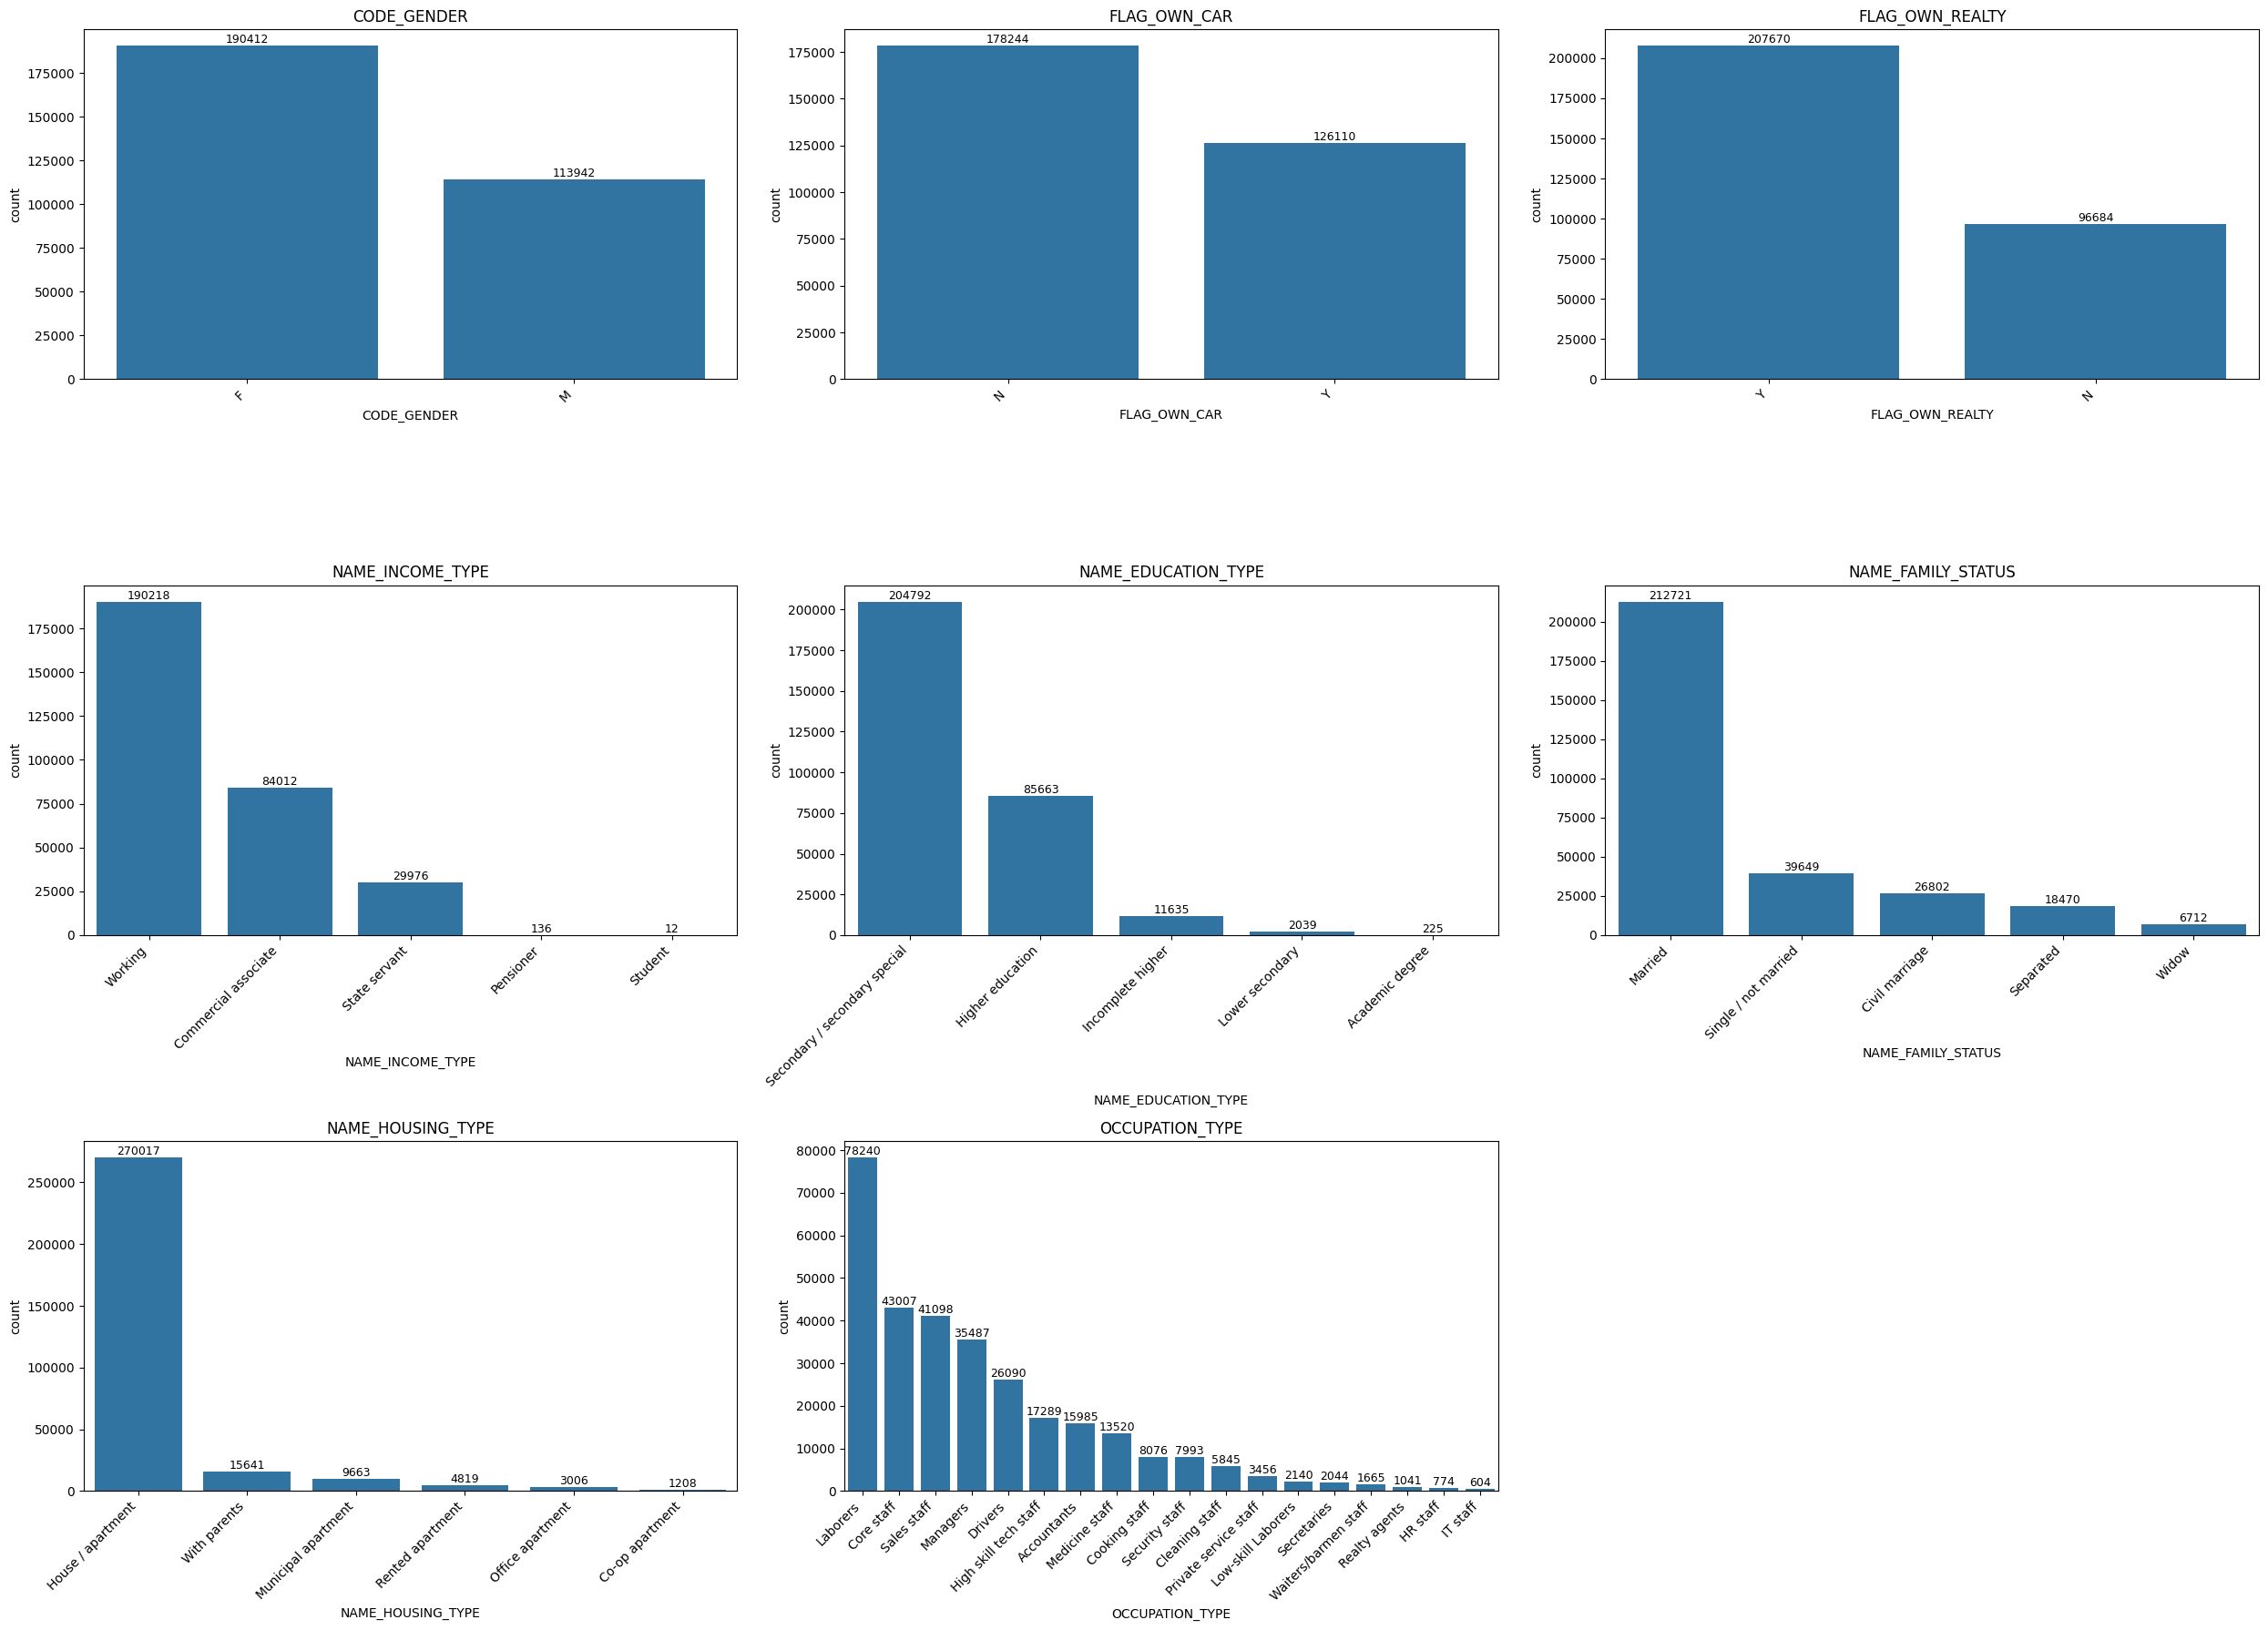

In [ ]:
n = len(categorical_column)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))
axes = axes.flatten()

for idx, col in enumerate(categorical_column):
    ax = axes[idx]
    order = df_a_clean[col].value_counts().index

    sns.countplot(data=df_a_clean, x=col, order=order, ax=ax)
    ax.set_title(col)

    # buat label x miring
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # tambahkan label count di atas bar
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

# hapus subplot kosong kalau jumlah kolom kategorinya tidak pas
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

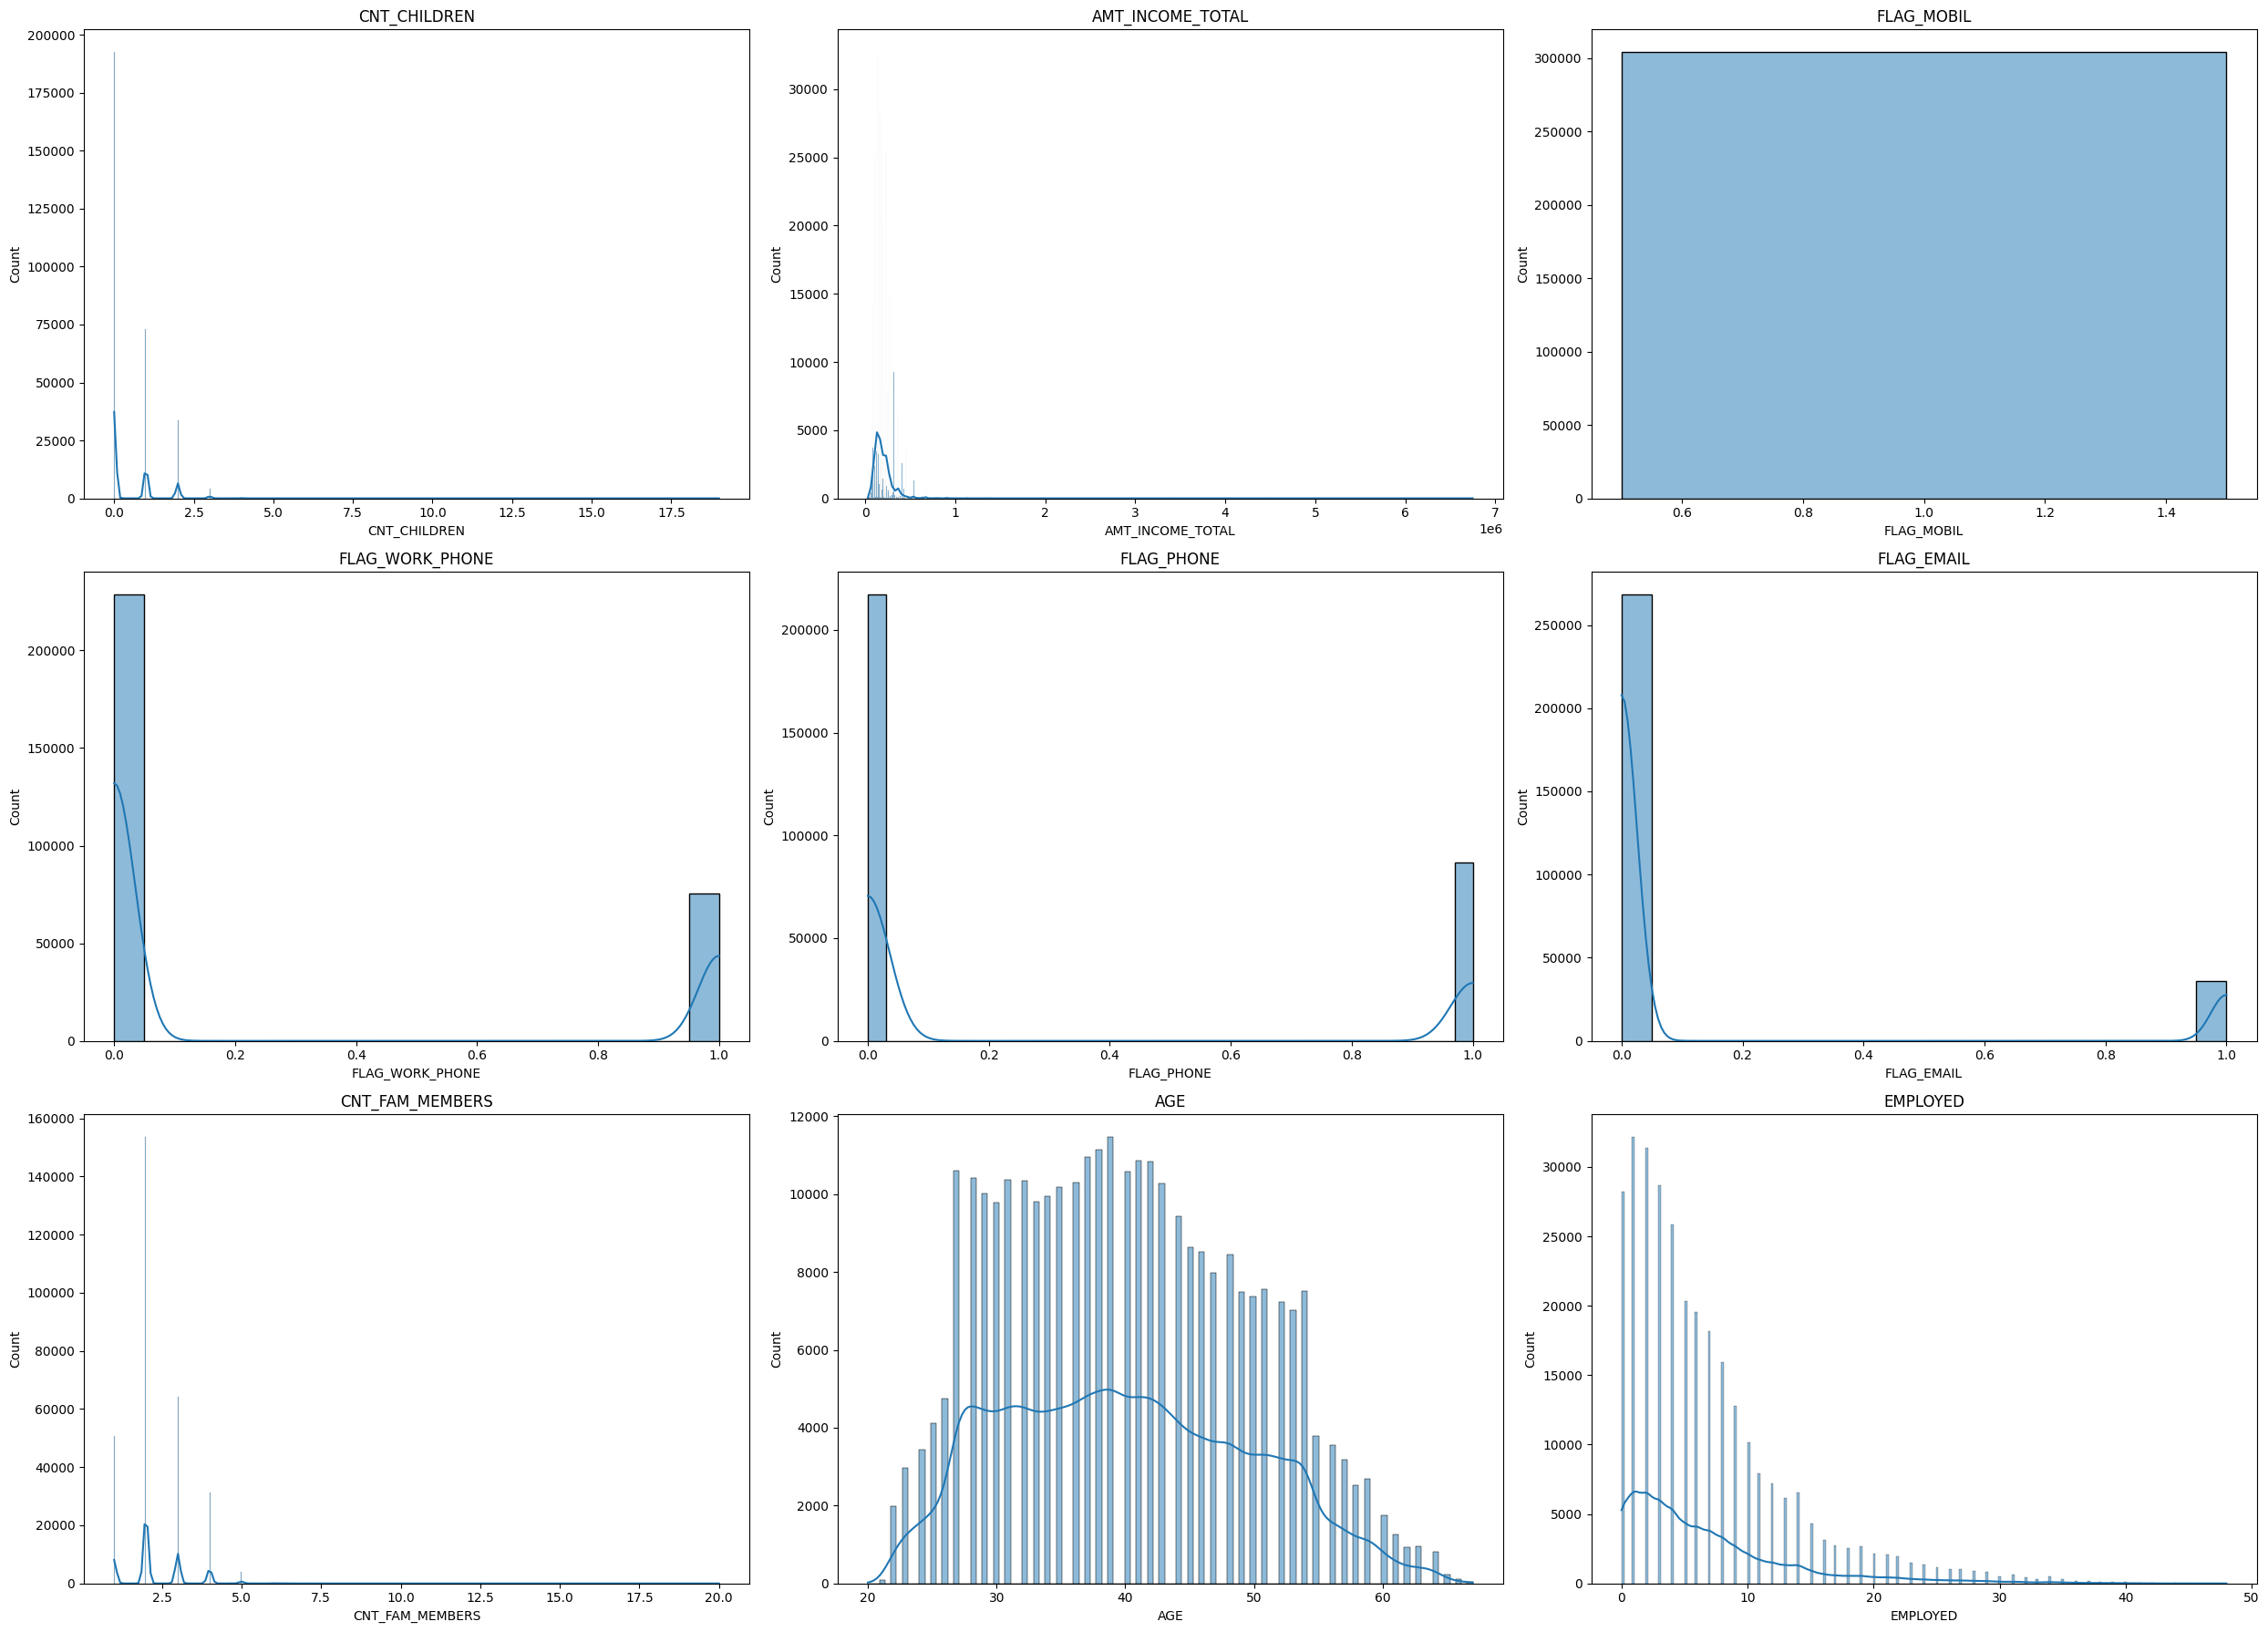

In [ ]:
numeric_columns = df_a_clean.select_dtypes(include=['int64', 'float64']).columns.drop('ID', errors='ignore')

n = len(numeric_columns)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    ax = axes[idx]
    sns.histplot(data=df_a_clean, x=col, kde=True, ax=ax)
    ax.set_title(col)

# hapus subplot kosong kalau jumlah kolom numeriknya tidak pas
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
for col in numeric_columns:
    print(f"Value counts for column: {col}")
    print(df_a_clean[col].value_counts().sort_index())
    print("="*50)
    print("\n")

Value counts for column: CNT_CHILDREN
CNT_CHILDREN
0     192856
1      73130
2      33512
3       4311
4        401
5        122
7          9
9          5
12         4
14         3
19         1
Name: count, dtype: int64


Value counts for column: AMT_INCOME_TOTAL
AMT_INCOME_TOTAL
27000.00         27
27900.00          1
28723.50          6
31500.00         27
32400.00          5
33750.00          7
35550.00          3
36000.00         95
36828.00          1
36900.00          4
37350.00          9
38250.00          8
40500.00         98
40950.00          7
41989.50          3
42750.00          5
45000.00        558
45900.00          1
46350.00          2
47250.00         12
47353.50          2
48150.00          1
49500.00        161
49549.50          1
50850.00          2
51750.00         59
53140.50          3
54000.00        714
54027.00         13
55350.00         23
56025.00          2
56250.00          5
57600.00          4
58500.00        376
58725.00          2
59400.00          8

# Identify Data Credit Record

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Check Duplicated Data

In [ ]:
df_c.duplicated().sum()

np.int64(0)

## Check Missing Values

In [ ]:
missing_values = []

for i in df_c.columns:
  isna = df_c[i].isna().sum()
  presentase = f'{isna/len(df_c)*100:.2f}%'
  missing_values.append({
      'column': i,
      'missing_value': isna,
      'presentation': presentase,
      'data_type': df_c[i].dtype
  })

missing_values = pd.DataFrame(missing_values)
missing_values

,column,missing_value,presentation,data_type
0,ID,0,0.00%,int64
1,MONTHS_BALANCE,0,0.00%,int64
2,STATUS,0,0.00%,object


## Feature Engineering

In [ ]:
df_c_clean = df_c.copy()
df_c_clean = df_c_clean[df_c_clean['STATUS'] != 'X']

In [ ]:
mapping = {
    "C": 100,
    "0": 80,
    "1": 60,
    "2": 40,
    "3": 20,
    "4": 10,
    "5": 0
}

df_c_clean["SCORE"] = df_c_clean["STATUS"].map(mapping)
df_c_clean.head()

,ID,MONTHS_BALANCE,STATUS,SCORE
1,5001711,-1,0,80
2,5001711,-2,0,80
3,5001711,-3,0,80
4,5001712,0,C,100
5,5001712,-1,C,100


In [ ]:
df_summary = df_c_clean.groupby("ID").agg(
    MIN_SCORE=("SCORE", "min"),
    AMOUNT_IN_ARREAR=("SCORE", lambda x: (x < 100).sum()),
    SCORE=("SCORE", "mean"),
    TENOR_AMOUNT=("SCORE", "count")
).reset_index()
df_summary["SCORE"] = df_summary["SCORE"].round(2)

In [ ]:
display(df_summary.head())
print("="*70)
display(df_summary.info())

,ID,MIN_SCORE,AMOUNT_IN_ARREAR,SCORE,TENOR_AMOUNT
0,5001711,80,3,80.00,3
1,5001712,80,10,89.47,19
2,5001717,80,17,84.55,22
3,5001718,60,26,80.69,29
4,5001719,80,2,99.07,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41449 entries, 0 to 41448
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                41449 non-null  int64  
 1   MIN_SCORE         41449 non-null  int64  
 2   AMOUNT_IN_ARREAR  41449 non-null  int64  
 3   SCORE             41449 non-null  float64
 4   TENOR_AMOUNT      41449 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


None

### Duplicated Data

In [ ]:
df_summary.duplicated(subset=['ID']).sum()

np.int64(0)

## EDA

### Visualization of the entire column

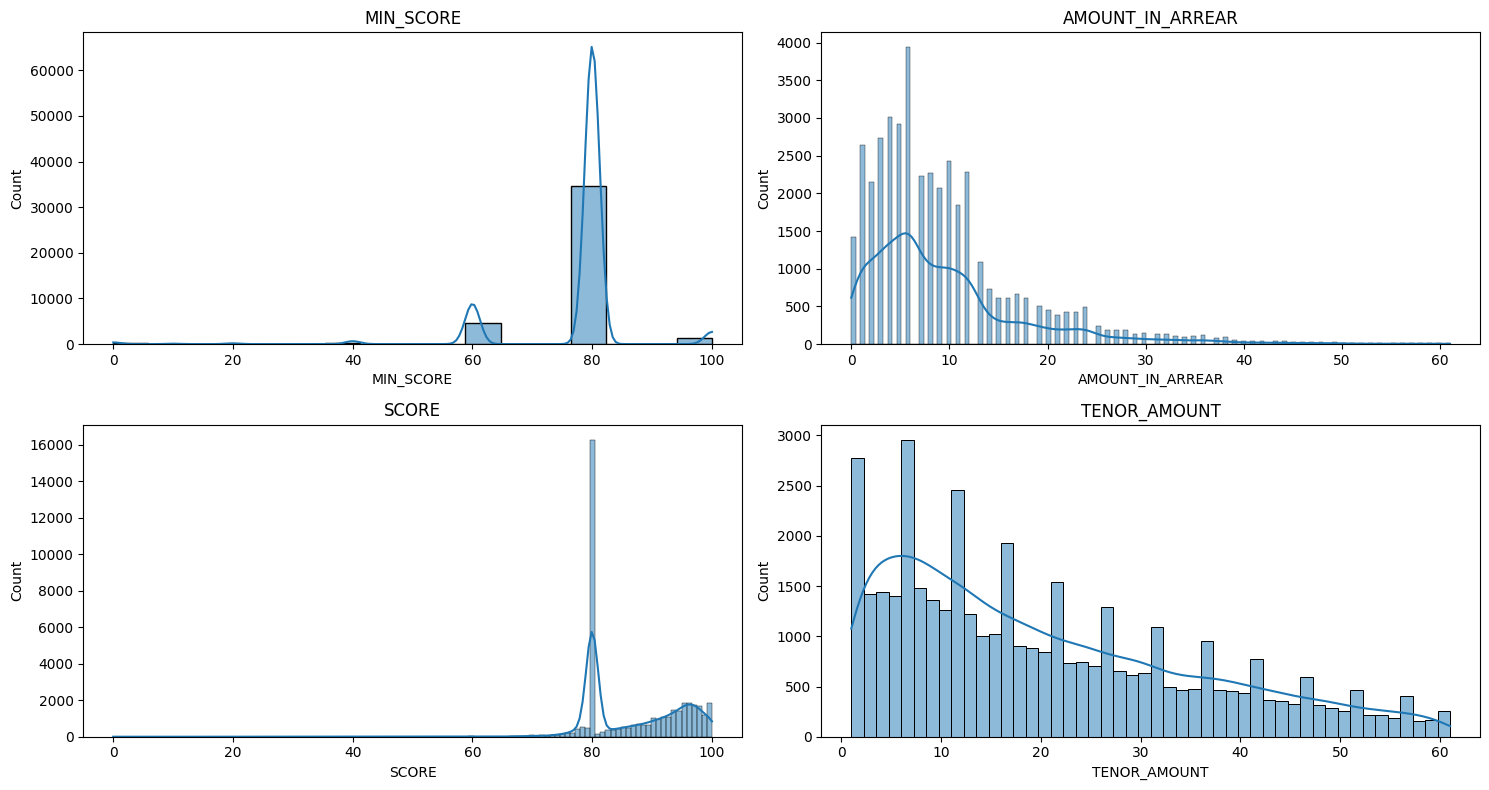

In [ ]:
numeric_columns_summary = df_summary.select_dtypes(include=['int64', 'float64']).columns.drop('ID', errors='ignore')


n = len(numeric_columns_summary)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns_summary):
    ax = axes[idx]
    sns.histplot(data=df_summary, x=col, kde=True, ax=ax)
    ax.set_title(col)

# hapus subplot kosong kalau jumlah kolom numeriknya tidak pas
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Merge Data

In [ ]:
df = df_a_clean.merge(df_summary, on="ID", how="left")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,EMPLOYED,MIN_SCORE,AMOUNT_IN_ARREAR,SCORE,TENOR_AMOUNT
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3,80.0,7.0,90.00,14.0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,80.0,2.0,80.00,2.0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,NaN,NaN,NaN,NaN
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,80.0,6.0,94.29,21.0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,80.0,6.0,96.36,33.0


## Data Cleaning

### Check Duplicated Data

In [ ]:
df.duplicated(subset=['ID']).sum()

np.int64(23)

In [ ]:
df = df.drop_duplicates(subset=['ID'])
df.duplicated(subset=['ID']).sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(columns=['ID'])

### Check Missing Values

In [ ]:
missing_values = []

for i in df.columns:
  isna = df[i].isna().sum()
  presentase = f'{isna/len(df)*100:.2f}%'
  missing_values.append({
      'column': i,
      'missing_value': isna,
      'presentation': presentase,
      'data_type': df[i].dtype
  })

missing_values = pd.DataFrame(missing_values)
missing_values

,column,missing_value,presentation,data_type
0,CODE_GENDER,0,0.00%,object
1,FLAG_OWN_CAR,0,0.00%,object
2,FLAG_OWN_REALTY,0,0.00%,object
3,CNT_CHILDREN,0,0.00%,int64
4,AMT_INCOME_TOTAL,0,0.00%,float64
5,NAME_INCOME_TYPE,0,0.00%,object
6,NAME_EDUCATION_TYPE,0,0.00%,object
7,NAME_FAMILY_STATUS,0,0.00%,object
8,NAME_HOUSING_TYPE,0,0.00%,object
9,FLAG_MOBIL,0,0.00%,int64


### Change Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304331 entries, 0 to 304353
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          304331 non-null  object 
 1   FLAG_OWN_CAR         304331 non-null  object 
 2   FLAG_OWN_REALTY      304331 non-null  object 
 3   CNT_CHILDREN         304331 non-null  int64  
 4   AMT_INCOME_TOTAL     304331 non-null  float64
 5   NAME_INCOME_TYPE     304331 non-null  object 
 6   NAME_EDUCATION_TYPE  304331 non-null  object 
 7   NAME_FAMILY_STATUS   304331 non-null  object 
 8   NAME_HOUSING_TYPE    304331 non-null  object 
 9   FLAG_MOBIL           304331 non-null  int64  
 10  FLAG_WORK_PHONE      304331 non-null  int64  
 11  FLAG_PHONE           304331 non-null  int64  
 12  FLAG_EMAIL           304331 non-null  int64  
 13  OCCUPATION_TYPE      304331 non-null  object 
 14  CNT_FAM_MEMBERS      304331 non-null  float64
 15  AGE                  3

In [ ]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('Int64')
df['MIN_SCORE'] = df['MIN_SCORE'].astype('Int64')
df['AMOUNT_IN_ARREAR'] = df['AMOUNT_IN_ARREAR'].astype('Int64')
df['TENOR_AMOUNT'] = df['TENOR_AMOUNT'].astype('Int64')

### Rename Columns

In [ ]:
df = df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'car',
    'FLAG_OWN_REALTY': 'property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education_type',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'OCCUPATION_TYPE': 'occupation',
    'CNT_FAM_MEMBERS': 'family_members',
    'AGE': 'age',
    'EMPLOYED': 'employed',
    'MIN_SCORE': 'min_score',
    'AMOUNT_IN_ARREAR': 'amount_in_arrear',
    'SCORE': 'score',
    'TENOR_AMOUNT': 'tenor_amount'
})
df.head(2)

,gender,car,property,children,income,income_type,education_type,family_status,housing_type,mobile,work_phone,phone,email,occupation,family_members,age,employed,min_score,amount_in_arrear,score,tenor_amount
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,58,3,80,7,90.0,14
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,80,2,80.0,2


In [ ]:
df_nan = df[df["tenor_amount"].isna()]

df_notnan = df[df["tenor_amount"].notna()]

print("Jumlah data target yang kosong:", len(df_nan))
print("Jumlah data target yang tidak kosong:", len(df_notnan))

print("=== Data NaN ===")
display(df_nan.head(2))

print("=== Data Tidak NaN ===")
display(df_notnan.head(2))

Jumlah data target yang kosong: 281594
Jumlah data target yang tidak kosong: 22737
=== Data NaN ===


,gender,car,property,children,income,income_type,education_type,family_status,housing_type,mobile,work_phone,phone,email,occupation,family_members,age,employed,min_score,amount_in_arrear,score,tenor_amount
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,<NA>,<NA>,NaN,<NA>
7,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,1,Accountants,2,46,2,<NA>,<NA>,NaN,<NA>


=== Data Tidak NaN ===


,gender,car,property,children,income,income_type,education_type,family_status,housing_type,mobile,work_phone,phone,email,occupation,family_members,age,employed,min_score,amount_in_arrear,score,tenor_amount
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,58,3,80,7,90.0,14
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,80,2,80.0,2


## EDA

### Visualization of the entire column

/tmp/ipython-input-2037849426.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-2037849426.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-2037849426.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-2037849426.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-2037849426.py:14: UserWarning: set_ticklabels() s

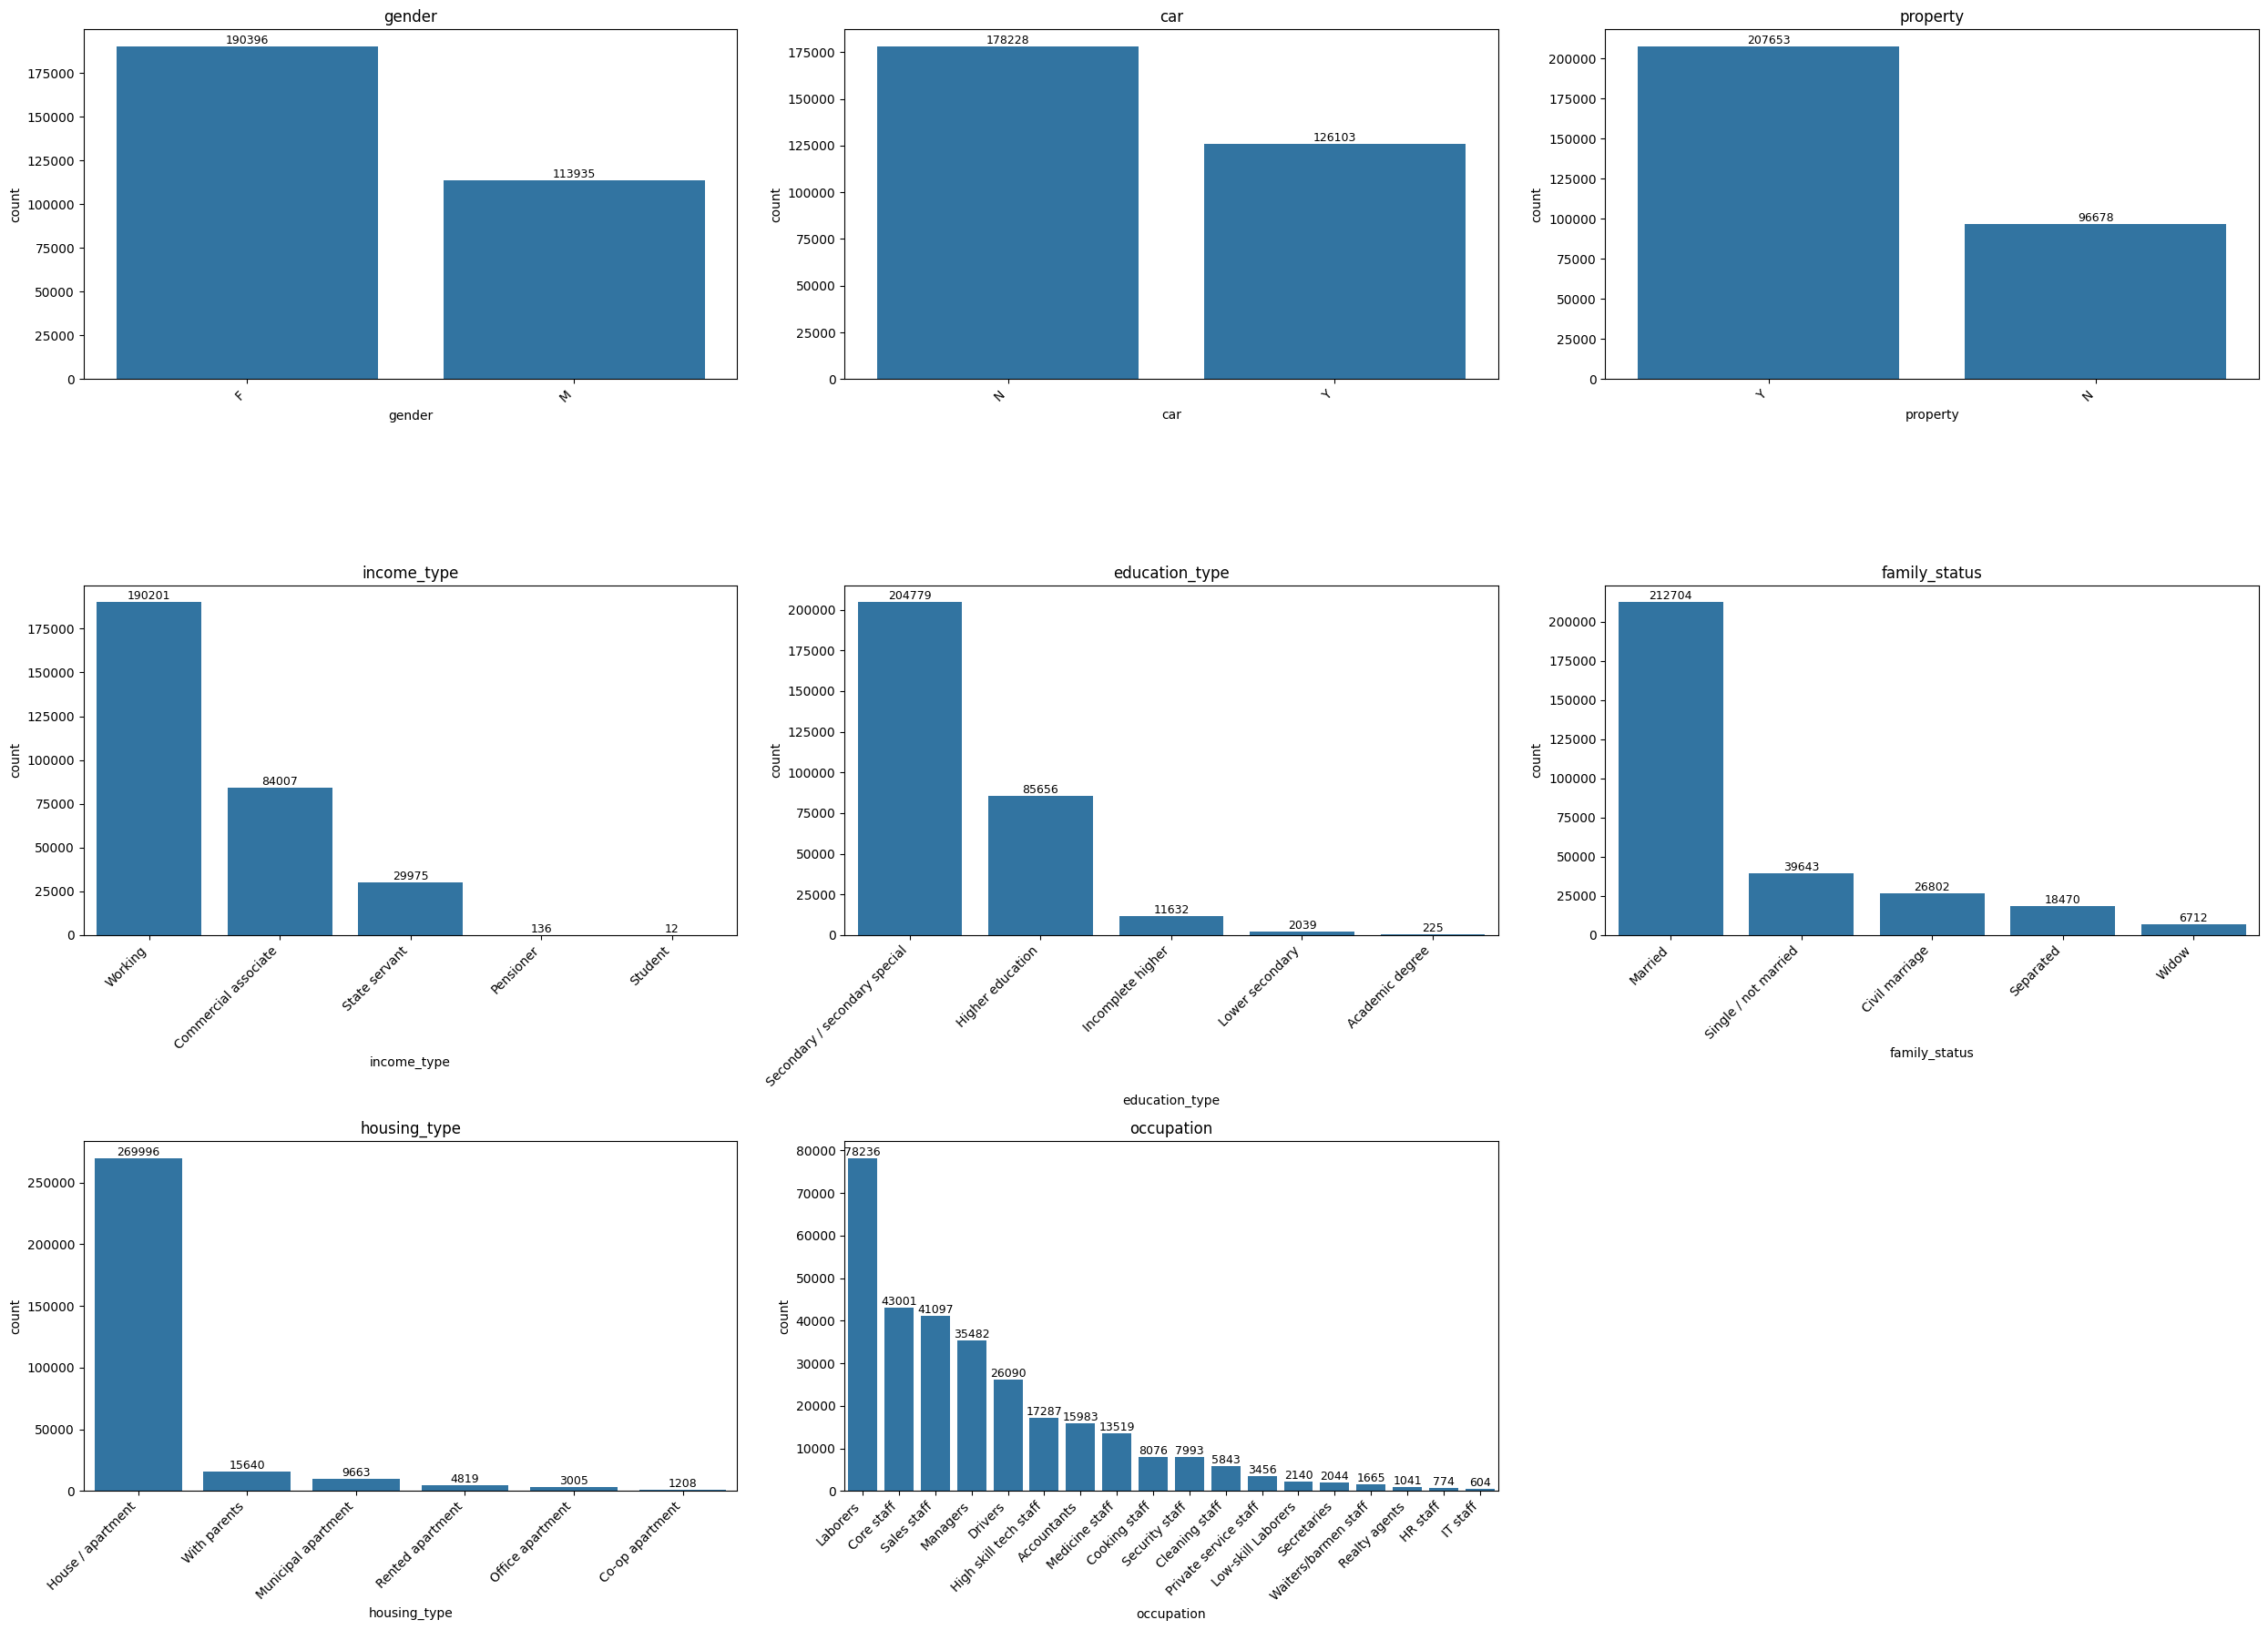

In [ ]:
df_categorical_cols = df.select_dtypes(include=['object']).columns
n = len(df_categorical_cols)
ncols = 3
nrows = math.ceil(n/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))
axes = axes.flatten()

for idx, col in enumerate(df_categorical_cols):
    ax = axes[idx]
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, ax=ax)
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-4061939291.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-4061939291.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-4061939291.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-4061939291.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipython-input-4061939291.py:14: UserWarning: set_ticklabels() s

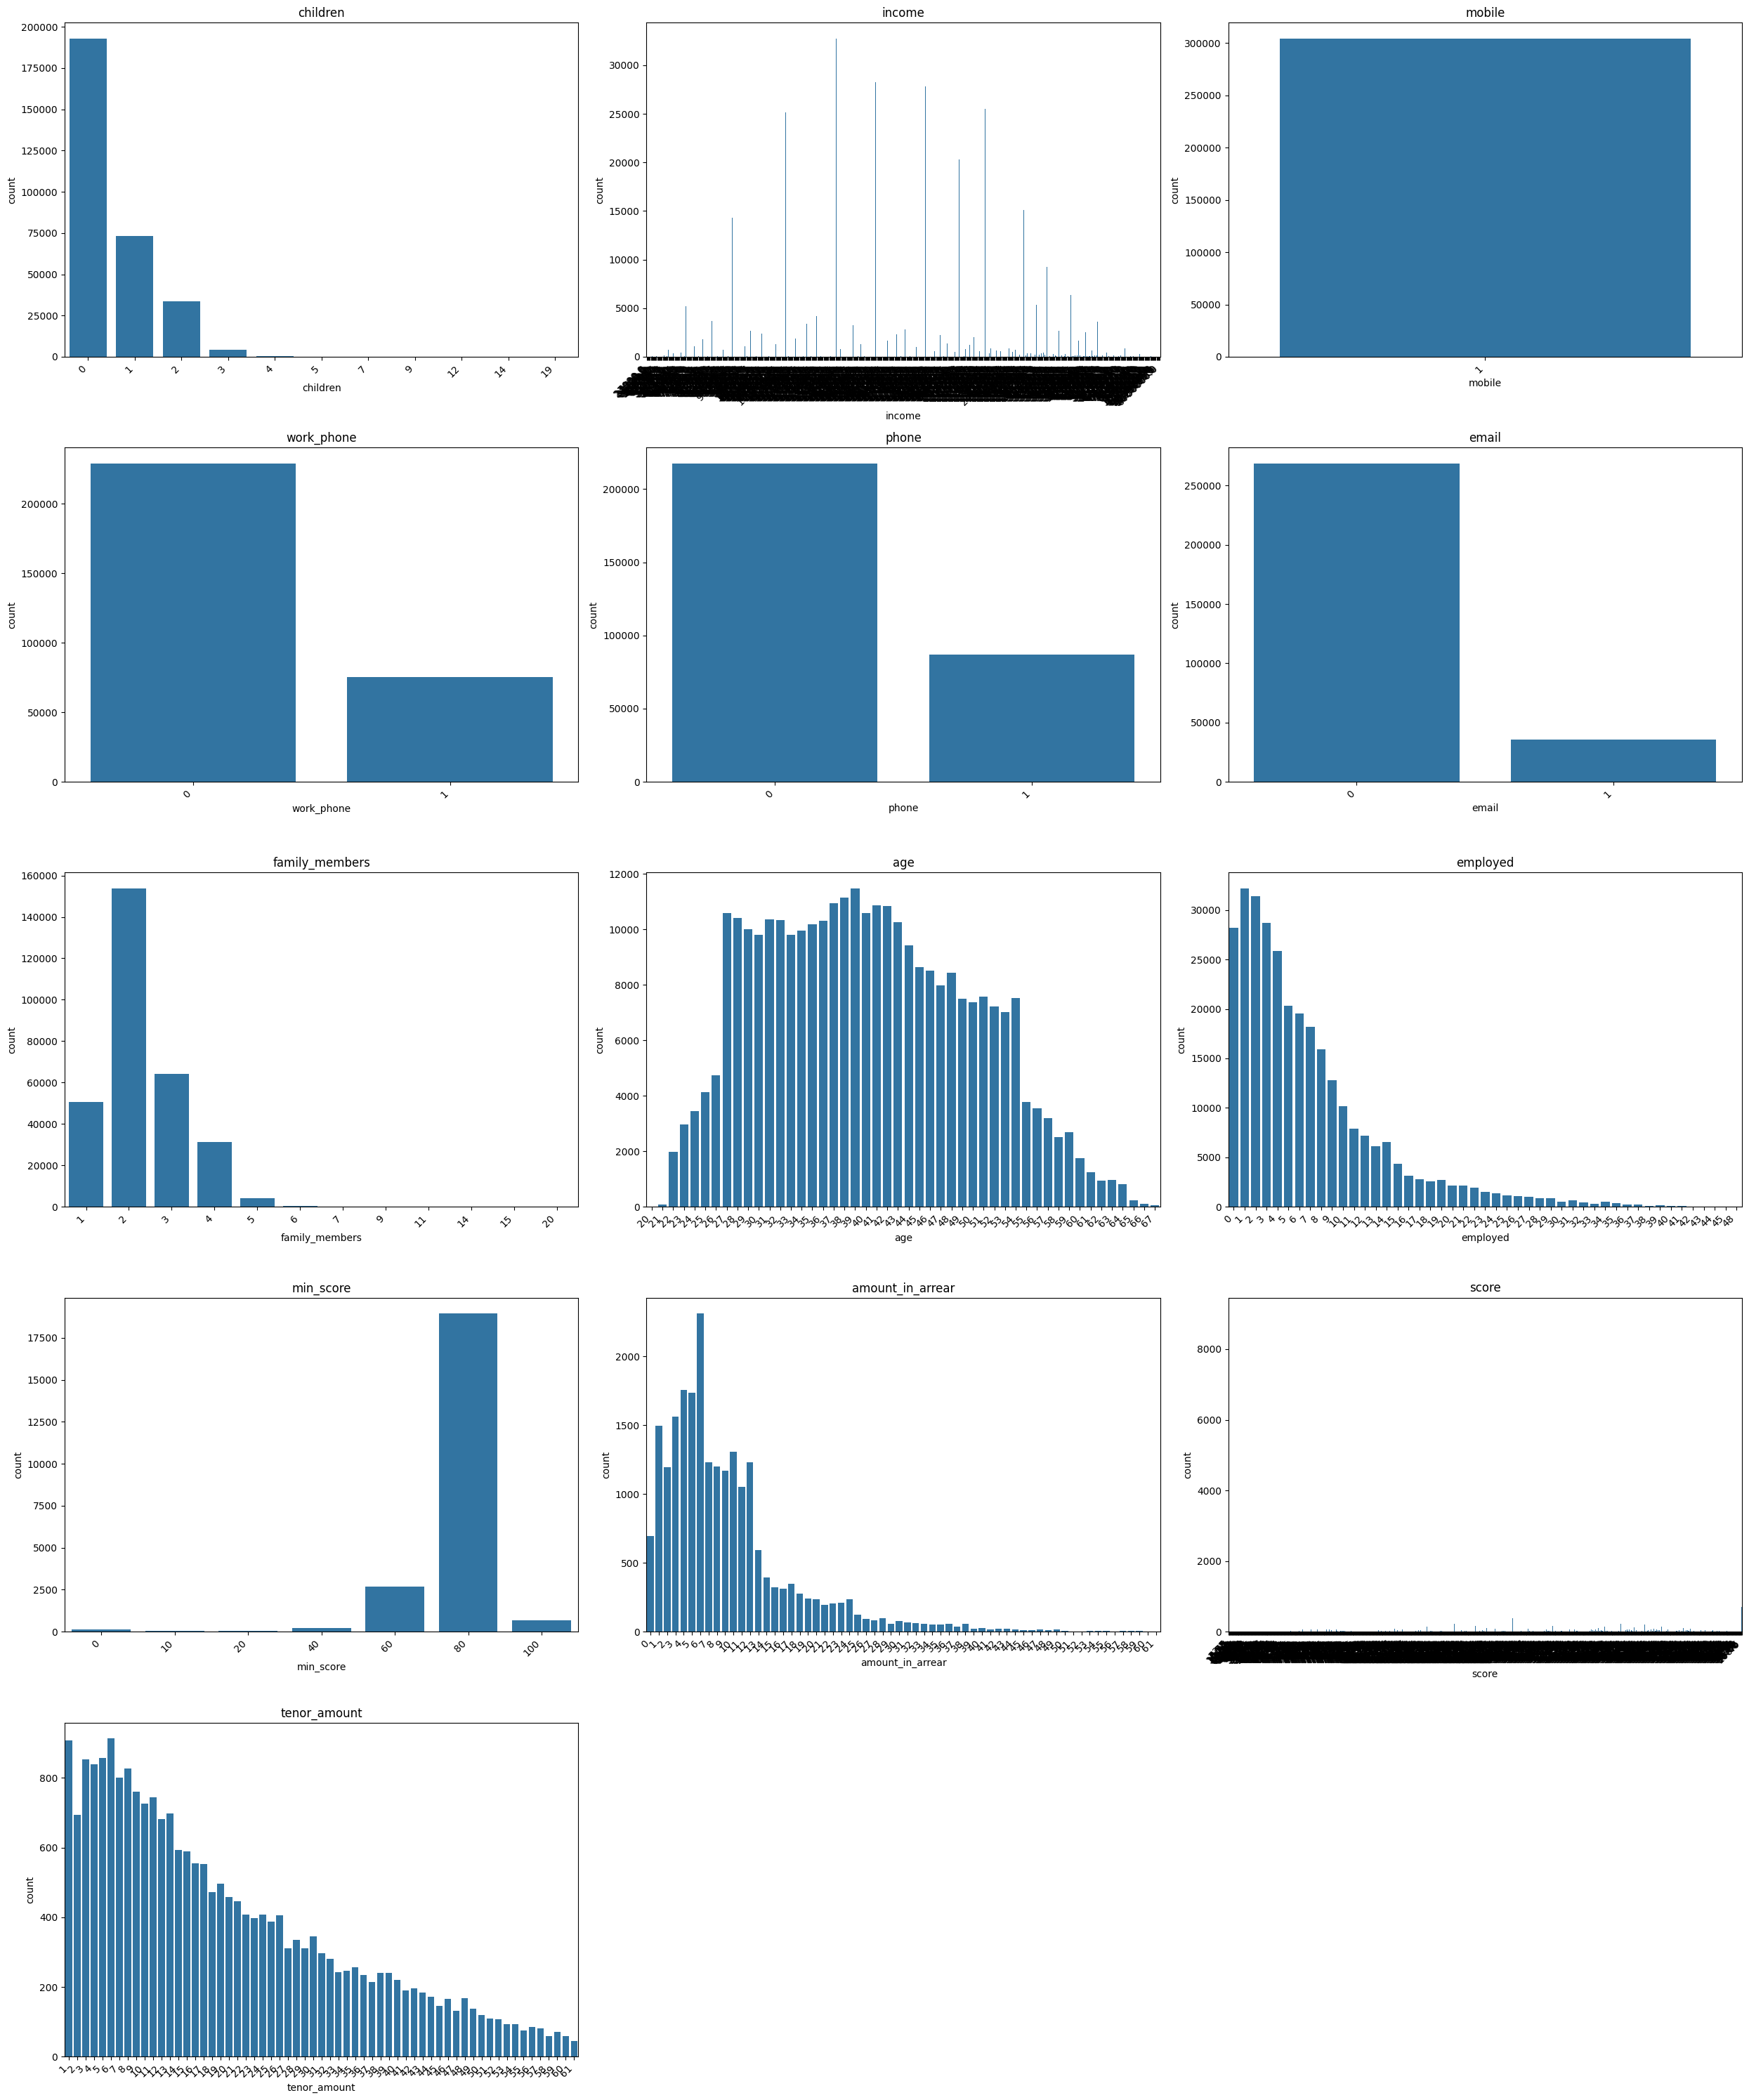

In [ ]:
df_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(df_numeric_cols)
ncols = 3
nrows = math.ceil(n/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))
axes = axes.flatten()

for idx, col in enumerate(df_numeric_cols):
    ax = axes[idx]
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    # for p in ax.patches:
    #     ax.annotate(
    #         f'{int(p.get_height())}',
    #         (p.get_x() + p.get_width()/2., p.get_height()),
    #         ha='center', va='bottom', fontsize=9
    #     )

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation

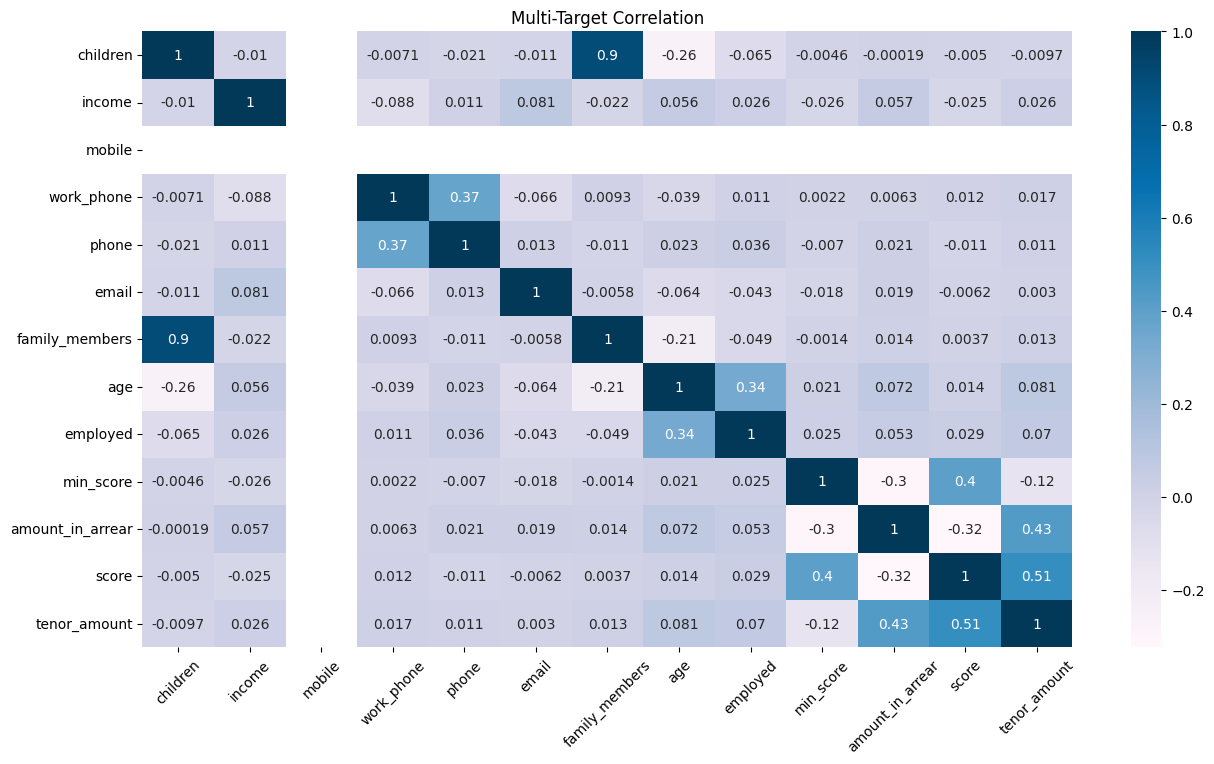

In [ ]:
plt.figure(figsize=(15,8))
df_corr = df_notnan.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(df_corr, cmap='PuBu', annot=True)
plt.title("Multi-Target Correlation")
plt.xticks(rotation=45)
plt.show()

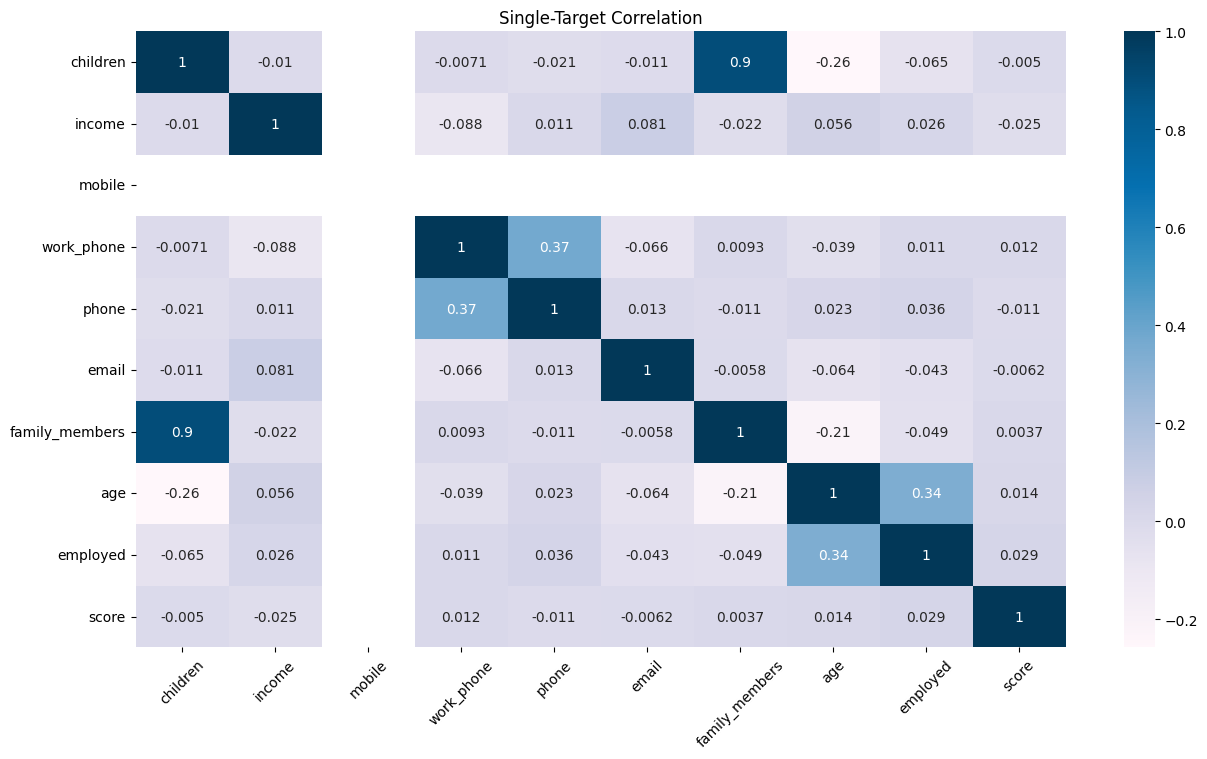

In [ ]:
plt.figure(figsize=(15,8))
df_corr2 = df_notnan.drop(columns=['min_score', 'amount_in_arrear', 'tenor_amount'])
df_corr2 = df_corr2.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(df_corr2, cmap='PuBu', annot=True)
plt.title("Single-Target Correlation")
plt.xticks(rotation=45)
plt.show()

### Identify

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304331 entries, 0 to 304353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            304331 non-null  object 
 1   car               304331 non-null  object 
 2   property          304331 non-null  object 
 3   children          304331 non-null  int64  
 4   income            304331 non-null  float64
 5   income_type       304331 non-null  object 
 6   education_type    304331 non-null  object 
 7   family_status     304331 non-null  object 
 8   housing_type      304331 non-null  object 
 9   mobile            304331 non-null  int64  
 10  work_phone        304331 non-null  int64  
 11  phone             304331 non-null  int64  
 12  email             304331 non-null  int64  
 13  occupation        304331 non-null  object 
 14  family_members    304331 non-null  Int64  
 15  age               304331 non-null  int64  
 16  employed          304331 

In [ ]:
check = ['income', 'age', 'employed']

for i in check:
    print(f'======= {i} =======')
    print(f'nilai minimal {i}: {min(df[i])}')
    print(f'nilai maksimal {i}: {max(df[i])}')
    print('\n')

======= income =======
nilai minimal income: 27000.0
nilai maksimal income: 6750000.0


======= age =======
nilai minimal age: 20
nilai maksimal age: 67


======= employed =======
nilai minimal employed: 0
nilai maksimal employed: 48




#### Feature Engineering

In [ ]:
eda = df.copy()
eda['age_group'] = pd.cut(eda['age'],
                          bins=[20, 25, 35, 45, 55, 65, 75],
                          labels=['20-25', '26-35', '36-45', '46-55', '56-65', '66-75'])
eda['income_group'] = pd.cut(eda['income'],
                          bins=[0, 100000, 500000, 1000000, 2000000, 5000000, 10000000],
                          labels=['<= 100K', '> 100K - 500K', '500K - 1M', '1M - 2M', '2M - 5M', '> 5M'])
eda['score_group'] = pd.cut(eda['score'],
                      bins=[0, 20, 40, 60, 80, 100],
                      labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
eda['employed_group'] = pd.cut(eda['employed'],
                               bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 50],
                               labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '> 40'])

eda_nonlabel = eda[eda['score'].isna()].copy()
eda_label = eda[eda['score'].notna()].copy()

In [ ]:
print("Jumlah data keseluruhan:")
display(eda.shape)
print("Jumlah data non label:")
display(eda_nonlabel.shape)
print("Jumlah data label:")
display(eda_label.shape)

Jumlah data keseluruhan:


(304331, 25)

Jumlah data non label:


(281594, 25)

Jumlah data label:


(22737, 25)

##### Age Distribution

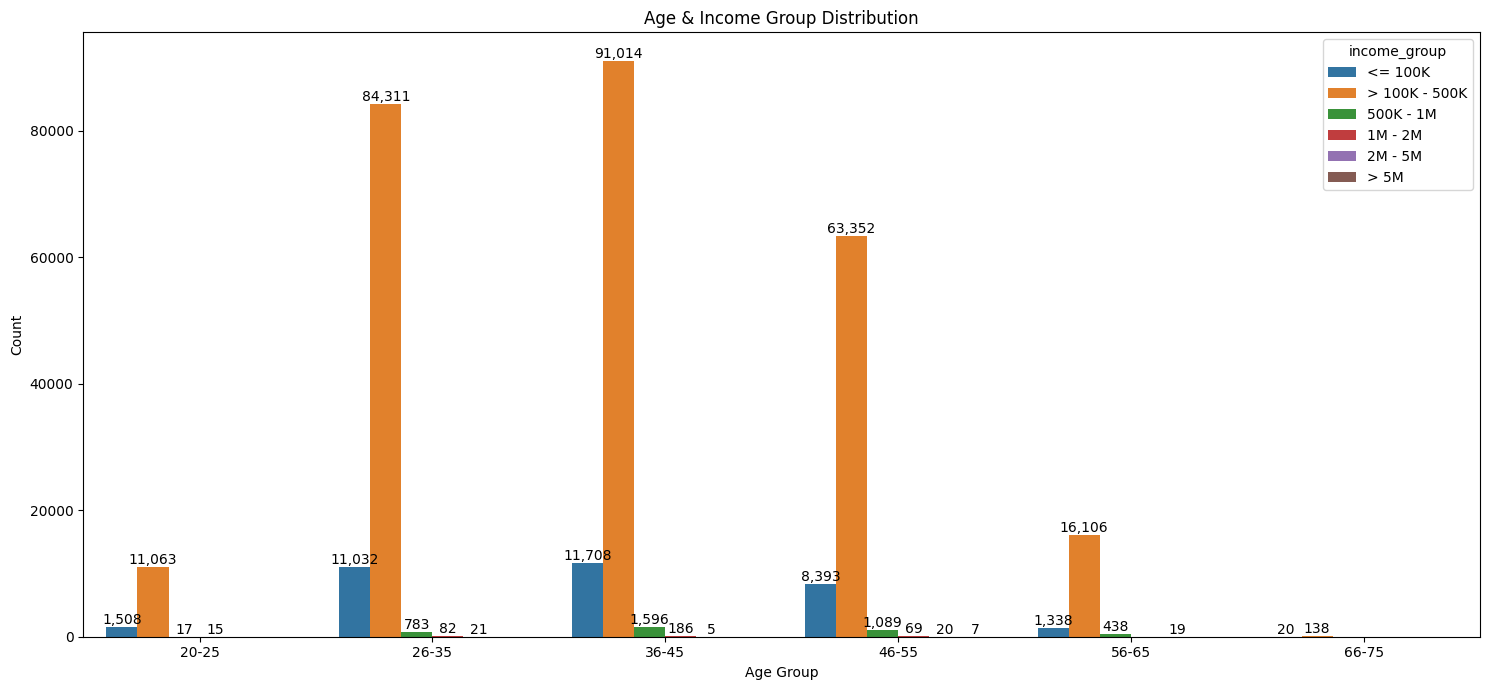

In [ ]:
plt.figure(figsize=(15,7))

age_dist = sns.countplot(data=eda, x='age_group', hue='income_group')

for i in age_dist.containers:
  age_dist.bar_label(i, fmt='{:,.0f}')

plt.title('Age & Income Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Gender vs Occupation

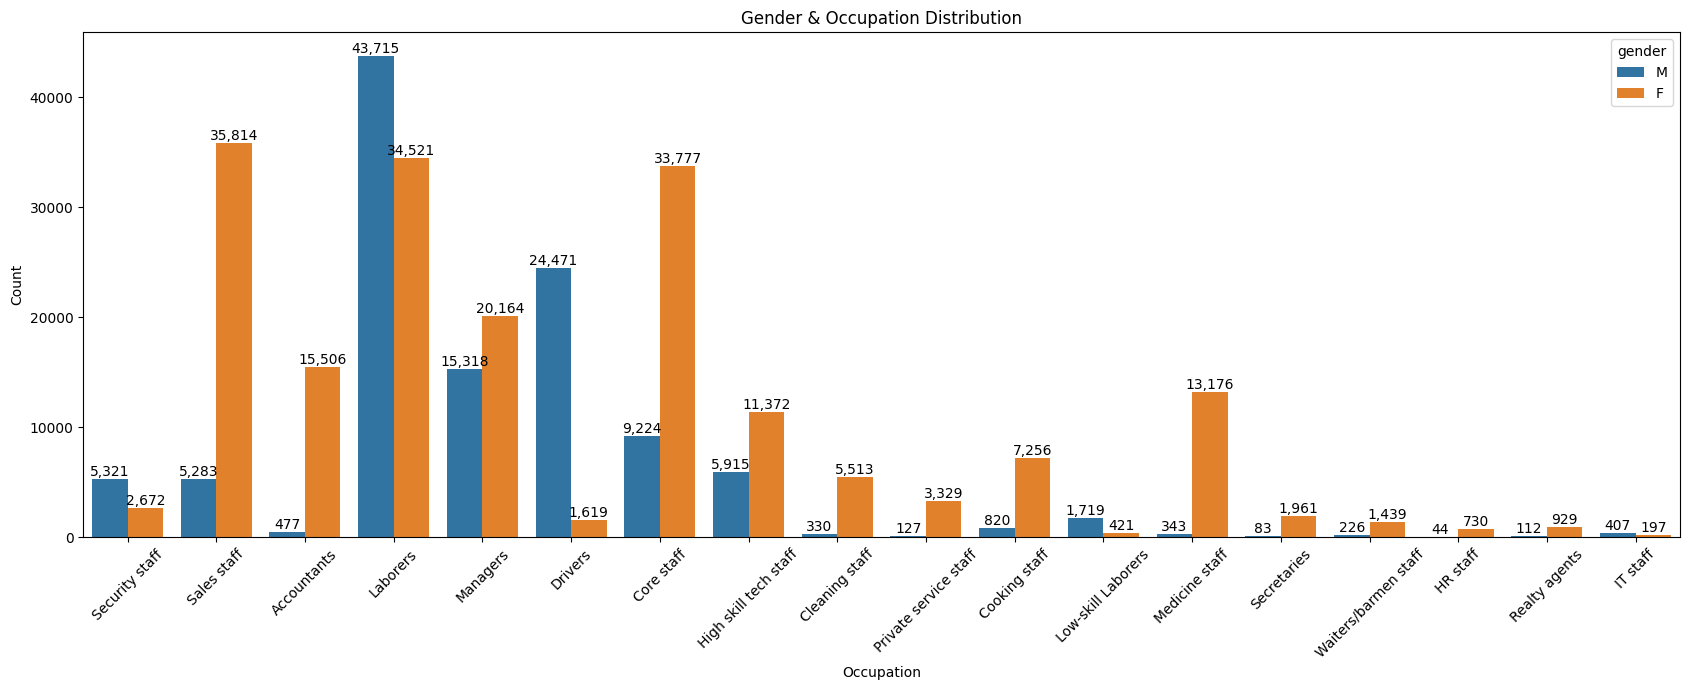

In [ ]:
plt.figure(figsize=(17,7))

gender_occupation = sns.countplot(data=eda, x='occupation', hue='gender')

for i in gender_occupation.containers:
  gender_occupation.bar_label(i, fmt='{:,.0f}')

plt.title('Gender & Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Income Group vs Gender Distribution

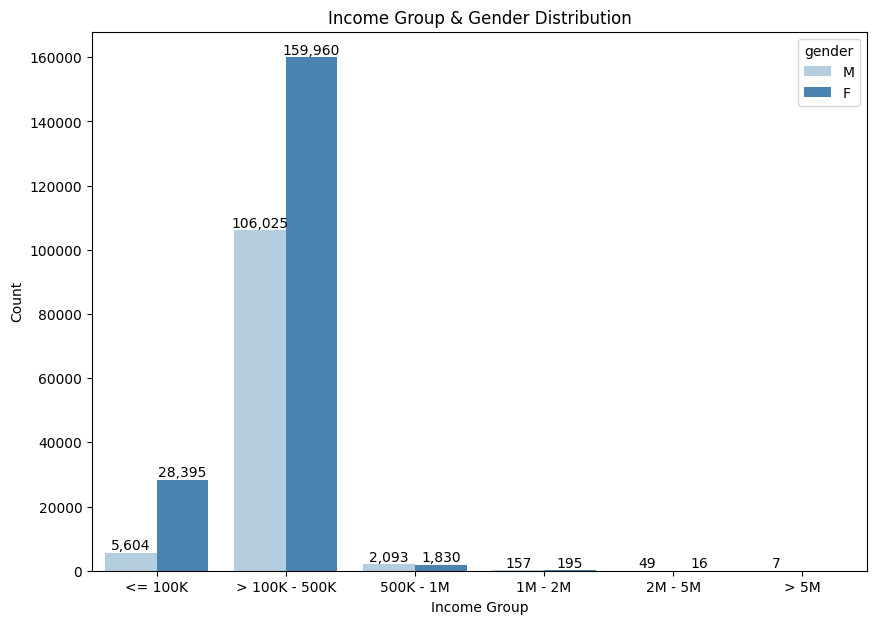

In [ ]:
plt.figure(figsize=(10, 7))

income_gender = sns.countplot(data=eda, x='income_group', hue='gender', palette='Blues')

for i in income_gender.containers:
    income_gender.bar_label(i, fmt='{:,.0f}')

plt.title('Income Group & Gender Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

##### Family Status vs House Type

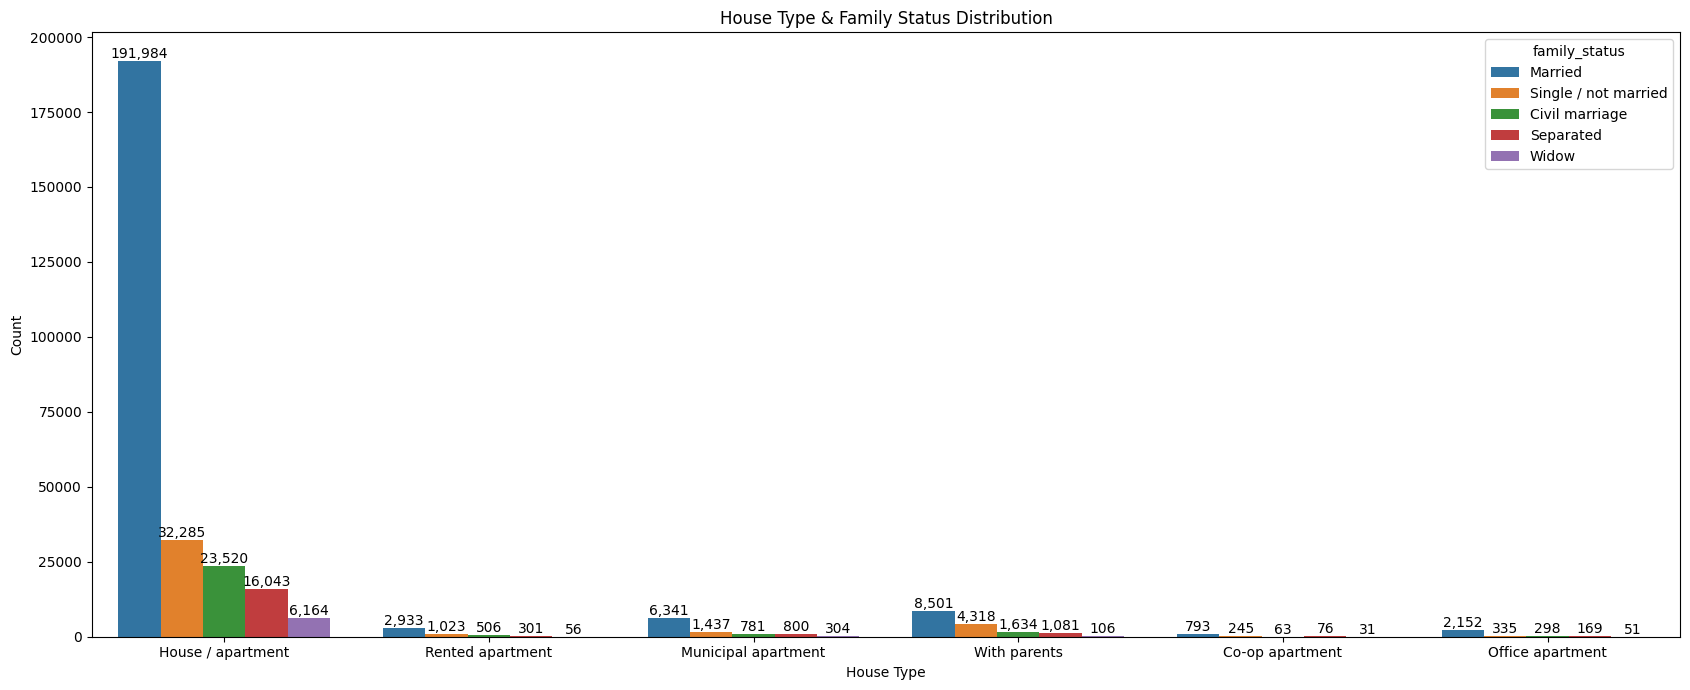

In [ ]:
plt.figure(figsize=(17,7))

family_house = sns.countplot(data=eda, x='housing_type', hue='family_status')

for i in family_house.containers:
  family_house.bar_label(i, fmt='{:,.0f}')

plt.title('House Type & Family Status Distribution')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Income vs Score

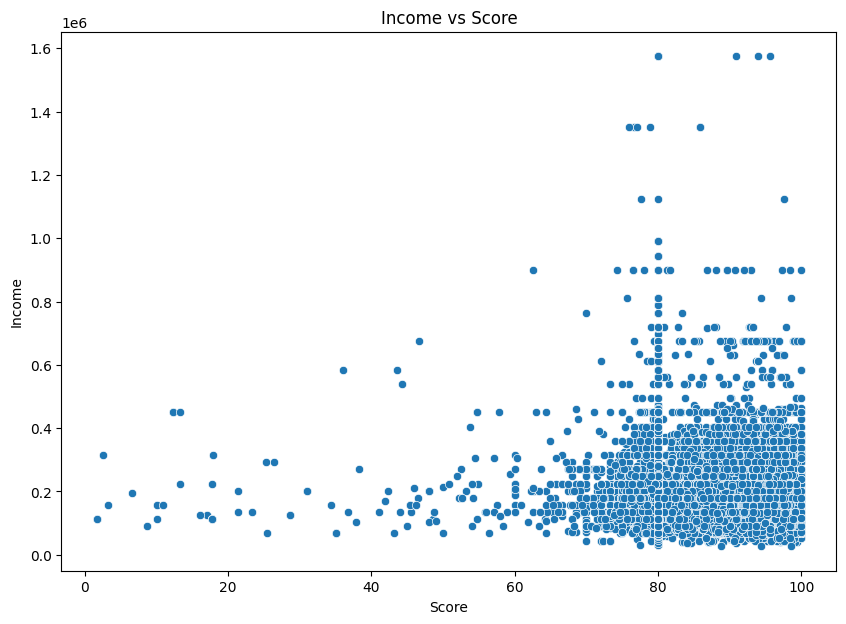

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    data=eda,
    x='score',
    y='income'
)

plt.title('Income vs Score')
plt.xlabel('Score')
plt.ylabel('Income')
plt.show()

##### Income vs Amount in Arrear

Text(0, 0.5, 'Income')

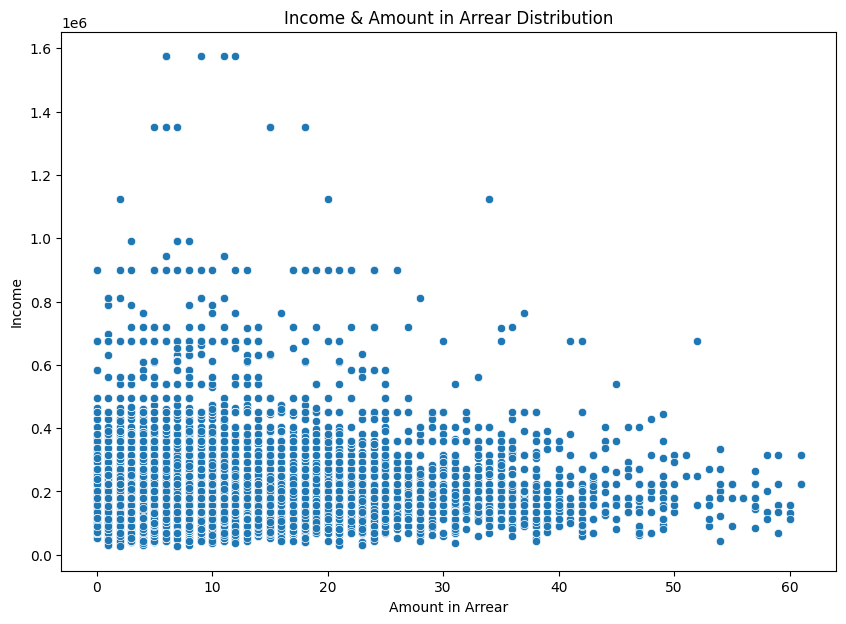

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    data=eda_label,
    x='amount_in_arrear',
    y='income'
)

plt.title('Income & Amount in Arrear Distribution')
plt.xlabel('Amount in Arrear')
plt.ylabel('Income')

##### Income vs Tenor Amount

Text(0, 0.5, 'Income')

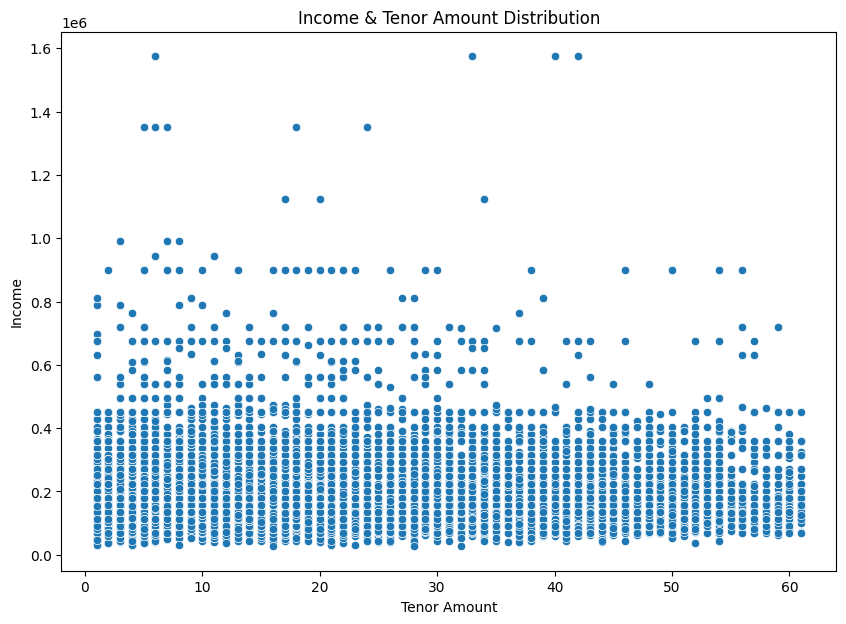

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    data=eda_label,
    x='tenor_amount',
    y='income'
)

plt.title('Income & Tenor Amount Distribution')
plt.xlabel('Tenor Amount')
plt.ylabel('Income')

##### Income vs Employment Status by Gender

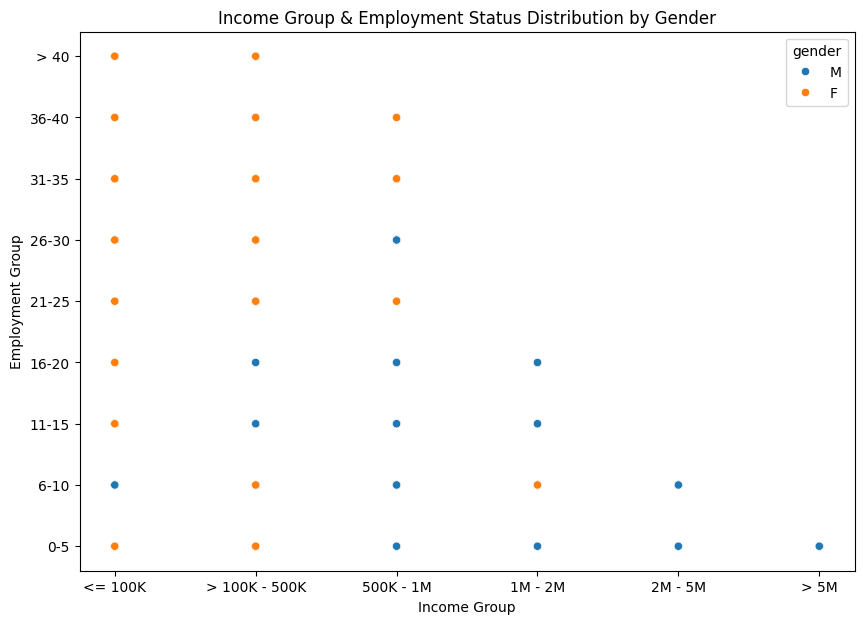

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=eda,
    x='income_group',
    y='employed_group',
    hue='gender',
)

plt.title('Income Group & Employment Status Distribution by Gender')
plt.xlabel('Income Group')
plt.ylabel('Employment Group')
# kondisi khusus, membalikkan urutan Y
plt.gca().invert_yaxis()
plt.show()

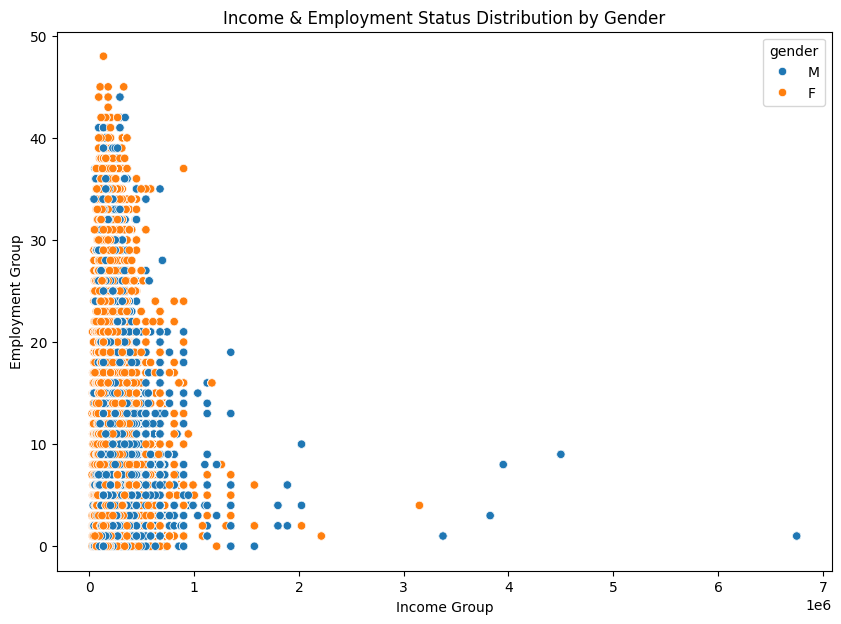

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=eda,
    x='income',
    y='employed',
    hue='gender'
)

plt.title('Income & Employment Status Distribution by Gender')
plt.xlabel('Income Group')
plt.ylabel('Employment Group')
plt.show()

##### Age Vs Employed

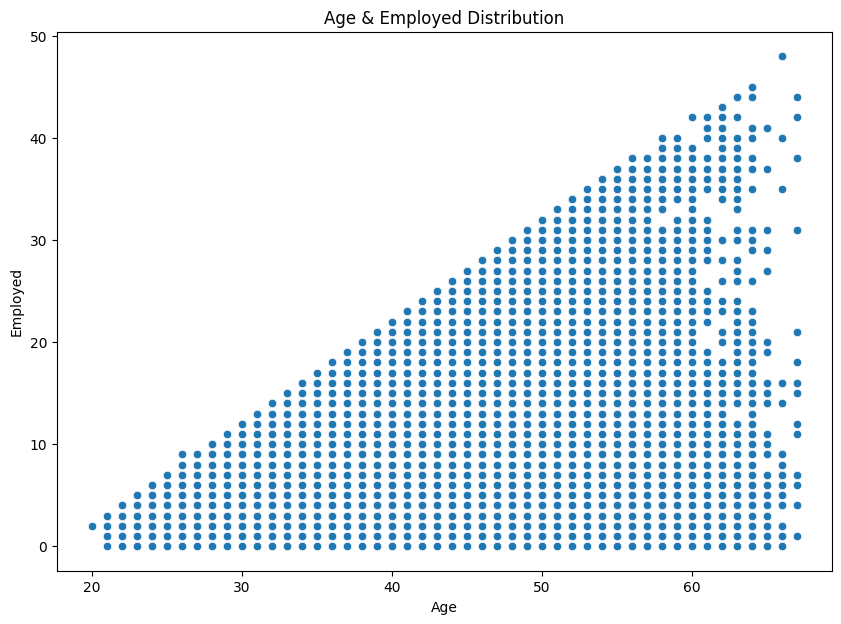

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    data=eda,
    x='age',
    y='employed'
)

plt.title('Age & Employed Distribution')
plt.xlabel('Age')
plt.ylabel('Employed')
plt.show()

# Machine Learning

## Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## Preprocess Data

In [ ]:
# first prediction
first_prediction = df.copy()

first_prediction_target = ["min_score", "amount_in_arrear", "score", "tenor_amount"]

first_label_data = first_prediction.dropna(subset=first_prediction_target).copy()
first_nonlabel_data = first_prediction[first_prediction[first_prediction_target].isna().any(axis=1)].copy()
print("First Prediction:")
print(f'Data Label: {first_label_data.shape[0]:,}')
print(f'Data Non Label: {first_nonlabel_data.shape[0]:,}')

# second prediction
second_prediction = df.drop(["min_score", "amount_in_arrear", "tenor_amount"],axis=1)
second_prediction_target = ["score"]

second_label_data = second_prediction.dropna(subset=second_prediction_target).copy()
second_nonlabel_data = second_prediction[second_prediction[second_prediction_target].isna().any(axis=1)].copy()
print("\nSecond Prediction:")
print(f'Data Label: {second_label_data.shape[0]:,}')
print(f'Data Non Label: {second_nonlabel_data.shape[0]:,}')

First Prediction:
Data Label: 22,737
Data Non Label: 281,594

Second Prediction:
Data Label: 22,737
Data Non Label: 281,594


### Feature-Target Split

In [ ]:
x_first = first_label_data.drop(columns=first_prediction_target)
y_first = first_label_data[first_prediction_target]

x_second = second_label_data.drop(columns=second_prediction_target)
y_second = second_label_data[second_prediction_target]

### Identify Categorical and Numeric Feature

In [ ]:
first_category_column = x_first.select_dtypes(include=['object']).columns.tolist()
first_numeric_column = x_first.select_dtypes(exclude=['object']).columns.tolist()

second_category_column = x_second.select_dtypes(include=['object']).columns.tolist()
second_numeric_column = x_second.select_dtypes(exclude=['object']).columns.tolist()

### Encoding

In [ ]:
first_ohe_cols = ['gender']
first_ord_cols = [col for col in first_category_column
                  if col not in first_ohe_cols]

second_ohe_cols = ['gender']
second_ord_cols = [col for col in second_category_column
                   if col not in second_ohe_cols]

print(f'First OHE: {first_ohe_cols}')
print(f'First Ordinal: {first_ord_cols}')
print(f'Second OHE: {second_ohe_cols}')
print(f'Second Ordinal: {second_ord_cols}')

First OHE: ['gender']
First Ordinal: ['car', 'property', 'income_type', 'education_type', 'family_status', 'housing_type', 'occupation']
Second OHE: ['gender']
Second Ordinal: ['car', 'property', 'income_type', 'education_type', 'family_status', 'housing_type', 'occupation']


In [ ]:
# because the category are the same, they are combined into a single variable
ohe_cols = ['gender']
ord_cols = [col for col in first_category_column
            if col not in ohe_cols]

print(f'OHE: {ohe_cols}')
print(f'Ordinal: {ord_cols}')

OHE: ['gender']
Ordinal: ['car', 'property', 'income_type', 'education_type', 'family_status', 'housing_type', 'occupation']


### Pipeline Preprocessing

In [ ]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

first_preprocessor = ColumnTransformer([
    ("num", numeric_transformer, first_numeric_column),
    ("ohe", ohe_transformer, ohe_cols),
    ("ord", ordinal_transformer, ord_cols)
])

second_preprocessor = ColumnTransformer([
    ("num", numeric_transformer, second_numeric_column),
    ("ohe", ohe_transformer, ohe_cols),
    ("ord", ordinal_transformer, ord_cols)
])

## Split Data

In [ ]:
# first prediction
x_first_train, x_first_test, y_first_train, y_first_test = train_test_split(x_first, y_first, test_size=0.2, random_state=42)

# second prediction
x_second_train, x_second_test, y_second_train, y_second_test = train_test_split(x_second, y_second, test_size=0.2, random_state=42)

## Transfrom Data

In [ ]:
# first prediction
x_first_train_enc = first_preprocessor.fit_transform(x_first_train)
x_first_test_enc = first_preprocessor.transform(x_first_test)

first_ohe_features = first_preprocessor.named_transformers_['ohe'].named_steps['onehot'].get_feature_names_out(ohe_cols)
first_ord_features = ord_cols
first_feature_names = list(first_numeric_column) + list(first_ohe_features) + first_ord_features

x_first_train_enc = pd.DataFrame(x_first_train_enc, columns=first_feature_names, index=x_first_train.index)
x_first_test_enc = pd.DataFrame(x_first_test_enc, columns=first_feature_names, index=x_first_test.index)

# second prediction
x_second_train_enc = second_preprocessor.fit_transform(x_second_train)
x_second_test_enc = second_preprocessor.transform(x_second_test)

second_ohe_features = second_preprocessor.named_transformers_['ohe'].named_steps['onehot'].get_feature_names_out(ohe_cols)
second_ord_features = ord_cols
second_feature_names = list(second_numeric_column) + list(second_ohe_features) + second_ord_features

x_second_train_enc = pd.DataFrame(x_second_train_enc, columns=second_feature_names, index=x_second_train.index)
x_second_test_enc = pd.DataFrame(x_second_test_enc, columns=second_feature_names, index=x_second_test.index)

## Feature Selection

In [ ]:
# first prediction
first_selector = SelectFromModel(RandomForestRegressor(n_estimators=200, random_state=42), threshold="median")
first_selector.fit(x_first_train_enc, y_first_train["score"])

first_selected_features = x_first_train_enc.columns[first_selector.get_support()].tolist()
print("First Selected Features:", first_selected_features)

# second prediction
second_selector = SelectFromModel(RandomForestRegressor(n_estimators=200, random_state=42), threshold="median")
second_selector.fit(x_second_train_enc, y_second_train["score"])

second_selected_features = x_second_train_enc.columns[second_selector.get_support()].tolist()
print("Second Selected Features:", second_selected_features)

First Selected Features: ['income', 'family_members', 'age', 'employed', 'property', 'income_type', 'education_type', 'family_status', 'occupation']
Second Selected Features: ['income', 'family_members', 'age', 'employed', 'property', 'income_type', 'education_type', 'family_status', 'occupation']


## Subset Feature

In [ ]:
# first prediction
x_first_train_sel = x_first_train_enc[first_selected_features]
x_first_test_sel = x_first_test_enc[first_selected_features]

# second prediction
x_second_train_sel = x_second_train_enc[second_selected_features]
x_second_test_sel = x_second_test_enc[second_selected_features]

## Machine Learning Models

In [ ]:
# first prediction models
first_models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Multi-output evaluation function
def evaluate_multioutput(y_first_true, y_first_pred, first_target_names):
    first_results = {}
    for i, col in enumerate(first_target_names):
        first_mae = mean_absolute_error(y_first_true.iloc[:, i], y_first_pred[:, i])
        first_rmse = mean_squared_error(y_first_true.iloc[:, i], y_first_pred[:, i])
        first_r2 = r2_score(y_first_true.iloc[:, i], y_first_pred[:, i])
        first_results[col] = {"MAE": first_mae, "RMSE": first_rmse, "R2": first_r2}
    return first_results

# second prediction models
second_models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Multi-output evaluation function
def evaluate_multioutput(y_second_true, y_second_pred, second_target_names):
    second_results = {}
    for i, col in enumerate(second_target_names):
        second_mae = mean_absolute_error(y_second_true.iloc[:, i], y_second_pred[:, i])
        second_rmse = mean_squared_error(y_second_true.iloc[:, i], y_second_pred[:, i])
        second_r2 = r2_score(y_second_true.iloc[:, i], y_second_pred[:, i])
        second_results[col] = {"MAE": second_mae, "RMSE": second_rmse, "R2": second_r2}
    return second_results

### First Model Training and Evaluation

In [ ]:
first_result = {}

for name, base_model in first_models.items():
    print(f"=== Training {name} ===")

    model = MultiOutputRegressor(base_model)
    model.fit(x_first_train_sel, y_first_train)

    y_first_pred = model.predict(x_first_test_sel)

    first_results_model = evaluate_multioutput(y_first_test, y_first_pred, first_prediction_target)

    for target, metrics in first_results_model.items():
        print(f"{name} → {target} → MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R²: {metrics['R2']:.4f}")

    # Average all target
    avg_first_mae = np.mean([metrics['MAE'] for metrics in first_results_model.values()])
    avg_first_rmse = np.mean([metrics['RMSE'] for metrics in first_results_model.values()])
    avg_first_r2 = np.mean([metrics['R2'] for metrics in first_results_model.values()])
    print(f"Average → MAE: {avg_first_mae:.4f}, RMSE: {avg_first_rmse:.4f}, R²: {avg_first_r2:.4f}")

    first_result[name] = first_results_model

=== Training RandomForest ===
RandomForest → min_score → MAE: 4.9376, RMSE: 101.4259, R²: 0.1500
RandomForest → amount_in_arrear → MAE: 5.0399, RMSE: 59.1313, R²: 0.0985
RandomForest → score → MAE: 5.9538, RMSE: 61.2773, R²: 0.1147
RandomForest → tenor_amount → MAE: 10.3241, RMSE: 190.2473, R²: 0.1009
Average → MAE: 6.5639, RMSE: 103.0205, R²: 0.1160
=== Training XGBoost ===
XGBoost → min_score → MAE: 5.6274, RMSE: 105.1349, R²: 0.1190
XGBoost → amount_in_arrear → MAE: 5.3481, RMSE: 59.5918, R²: 0.0914
XGBoost → score → MAE: 6.6113, RMSE: 62.5765, R²: 0.0959
XGBoost → tenor_amount → MAE: 10.9788, RMSE: 193.6027, R²: 0.0851
Average → MAE: 7.1414, RMSE: 105.2265, R²: 0.0978
=== Training LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data p

### Second Model Training and Evaluation

In [ ]:
second_result = {}

for name, base_model in second_models.items():
    print(f"=== Training {name} ===")

    model = base_model
    model.fit(x_second_train_sel, y_second_train)

    y_second_pred = model.predict(x_second_test_sel)

    metrics = {
        "MAE": mean_absolute_error(y_second_test, y_second_pred),
        "RMSE": mean_squared_error(y_second_test, y_second_pred),
        "R2": r2_score(y_second_test, y_second_pred)
    }

    print(f"{name} → MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R²: {metrics['R2']:.4f}")

    second_result[name] = metrics

=== Training RandomForest ===


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest → MAE: 5.9538, RMSE: 61.2773, R²: 0.1147
=== Training XGBoost ===
XGBoost → MAE: 6.6113, RMSE: 62.5765, R²: 0.0959
=== Training LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 18189, number of used features: 9
[LightGBM] [Info] Start training from score 86.471717
LightGBM → MAE: 6.9436, RMSE: 64.1845, R²: 0.0727


### Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning was performed on the first model (multi output) because the overall results were better.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(300, 700),     # jumlah pohon dalam forest
    'max_depth': randint(5, 30),           # kedalaman maksimum tiap pohon
    'min_samples_split': randint(2, 20),   # minimal jumlah sample untuk split node
    'min_samples_leaf': randint(1, 10)     # minimal jumlah sample di leaf node
}

# Model RandomForest
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, random_state=42)
random_search.fit(x_first_train_sel, y_first_train)

# Hyperparameter tuning results
print(f"Best Parameters: {random_search.best_params_}")
best_model = random_search.best_estimator_

# Evaluation of the best model
y_first_pred = best_model.predict(x_first_test_sel)
first_evaluate_model = evaluate_multioutput(y_first_test, y_first_pred, first_prediction_target)

for target, metrics in first_evaluate_model.items():
    print(f"{target} → MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R²: {metrics['R2']:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 613}
min_score → MAE: 5.3608, RMSE: 101.4393, R²: 0.1499
amount_in_arrear → MAE: 5.1723, RMSE: 56.5590, R²: 0.1377
score → MAE: 6.3349, RMSE: 58.8009, R²: 0.1505
tenor_amount → MAE: 10.4856, RMSE: 181.7466, R²: 0.1411


### Feature Permutation

,feature,importance,std
8,age,0.127253,0.003819
7,employed,0.122057,0.004778
6,income,0.111062,0.006331
5,occupation,0.062976,0.002942
4,family_status,0.040220,0.001746
3,family_members,0.032737,0.001789
2,property,0.030289,0.002511
1,income_type,0.022660,0.001862
0,education_type,0.019513,0.002811


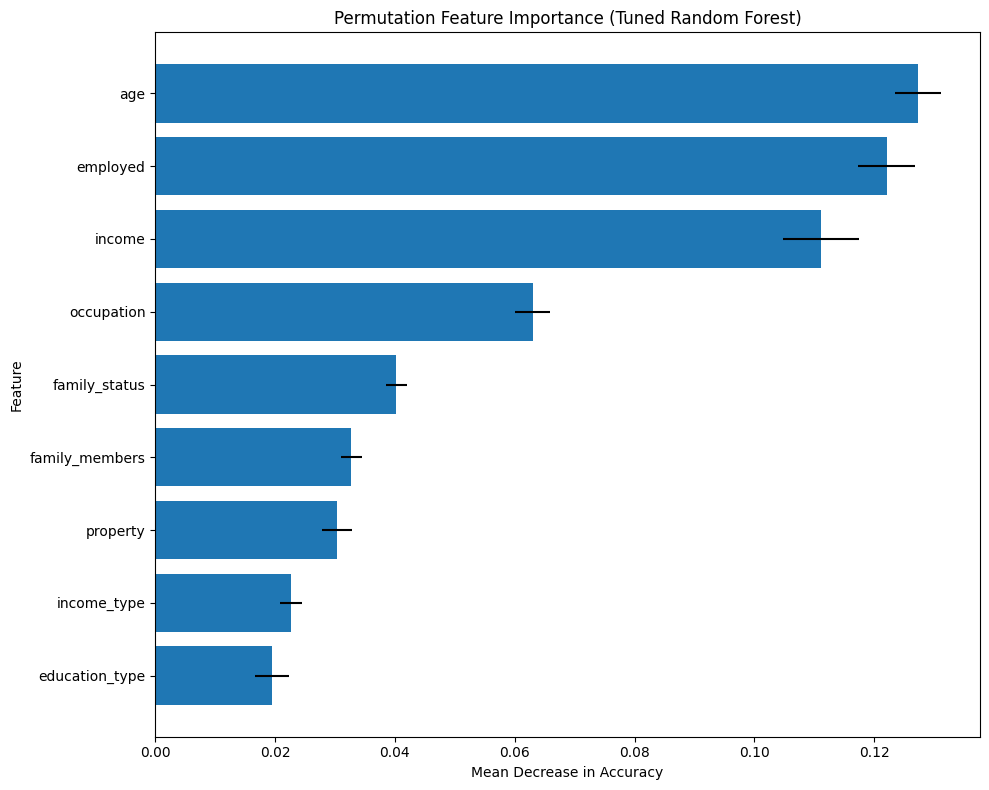

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(best_model, x_first_test_sel, y_first_test, n_repeats=10, random_state=42, n_jobs=-1)

# Sort the feature importances
sorted_idx = result.importances_mean.argsort()

# Create a DataFrame for easier visualization
perm_importance_df = pd.DataFrame({
    'feature': x_first_test_sel.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx],
    'std': result.importances_std[sorted_idx]
})

# Display the feature importance
display(perm_importance_df.sort_values(by='importance', ascending=False))

# Optional: Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(perm_importance_df['feature'], perm_importance_df['importance'], xerr=perm_importance_df['std'])
plt.title('Permutation Feature Importance (Tuned Random Forest)')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Data Prediction

### Data Non Label

In [ ]:
# Preprocess df_nonlabel
# Create a copy of df_nonlabel with all columns, including target_cols with NaN values
df_nonlabel_with_targets = first_nonlabel_data.copy()

# Apply the preprocessor to the df_nonlabel with all columns
df_nonlabel_processed = first_preprocessor.transform(df_nonlabel_with_targets)
df_nonlabel_processed = pd.DataFrame(df_nonlabel_processed, columns=first_feature_names)


# Select the final features
df_nonlabel_final_features = df_nonlabel_processed[first_selected_features]

# Predict the missing values using the best model
predicted_values = best_model.predict(df_nonlabel_final_features)

# Add the predicted values back to df_nonlabel
first_nonlabel_data[first_prediction_target] = predicted_values

# Display the updated df_nonlabel
print("Shape of the data prediction dataframe:", first_nonlabel_data.shape)
print("=== Data Non-Label dengan Prediksi ===")
display(first_nonlabel_data.tail())

Shape of the data prediction dataframe: (281594, 21)
=== Data Non-Label dengan Prediksi ===


,gender,car,property,children,income,income_type,education_type,family_status,housing_type,mobile,work_phone,phone,email,occupation,family_members,age,employed,min_score,amount_in_arrear,score,tenor_amount
304349,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,1,1,0,0,Laborers,2,37,6,77.677406,8.938122,88.044585,22.187634
304350,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,34,5,79.034427,6.662050,85.525212,14.153941
304351,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,1,43,8,79.207572,7.814037,87.396870,18.569122
304352,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1,1,0,0,Sales staff,1,22,1,72.635236,6.461488,84.812010,13.720946
304353,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Sales staff,2,51,3,80.385009,4.809213,84.521888,9.897236


In [ ]:
from google.colab import files
first_nonlabel_data.to_csv('data_prediction.csv', index=False)
files.download('data_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### All Data

In [ ]:
# Combine
df_combined = pd.concat([first_label_data, first_nonlabel_data], ignore_index=True)

print("Shape of the combined dataframe:", df_combined.shape)
display(df_combined.tail(5))

Shape of the combined dataframe: (304331, 21)


,gender,car,property,children,income,income_type,education_type,family_status,housing_type,mobile,work_phone,phone,email,occupation,family_members,age,employed,min_score,amount_in_arrear,score,tenor_amount
304326,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,1,1,0,0,Laborers,2,37,6,77.677406,8.938122,88.044585,22.187634
304327,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,34,5,79.034427,6.66205,85.525212,14.153941
304328,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,1,43,8,79.207572,7.814037,87.396870,18.569122
304329,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1,1,0,0,Sales staff,1,22,1,72.635236,6.461488,84.812010,13.720946
304330,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Sales staff,2,51,3,80.385009,4.809213,84.521888,9.897236


In [ ]:
from google.colab import files
df_combined.to_csv('data_combined.csv', index=False)
files.download('data_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>